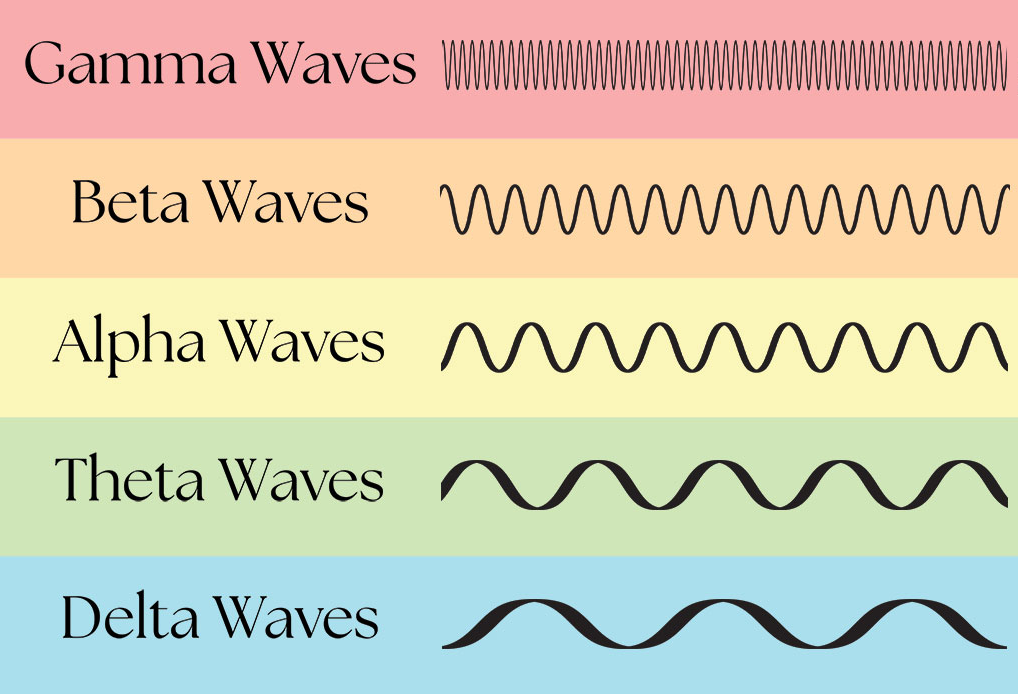

## Connecting to Google Drive

In [1]:
# Autenticar e configurar o Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import io
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

# Autenticação no Google
auth.authenticate_user()

# Obter as credenciais e configurar a API
credentials = GoogleCredentials.get_application_default()
gauth = GoogleAuth()
gauth.credentials = credentials
drive = GoogleDrive(gauth)
service = build('drive', 'v3', credentials=credentials)

# ID da pasta no Google Drive
folder_id = '1GmMKGFO83FDQH3bAFTNmyr47Pi85bCBy'

# Listar arquivos na pasta usando a API do Google Drive
results = service.files().list(q=f"'{folder_id}' in parents and trashed=false").execute()
items = results.get('files', [])

if not items:
    print('Nenhum arquivo encontrado na pasta.')
else:
    for item in items:
        print(f"Nome do arquivo: {item['name']}, ID: {item['id']}")

# Function to upload a file to Google Drive
def upload_to_drive(file_path):
    # Extract file name from the path
    file_name = file_path.split('/')[-1]

    # Create a file object in Google Drive
    gfile = drive.CreateFile({'title': file_name})

    # Set the content of the file from the local path
    gfile.SetContentFile(file_path)

    # Upload the file to Google Drive
    gfile.Upload()
    print(f"File '{file_name}' uploaded to Google Drive.")

Nome do arquivo: Testing normality and Non-parametrical Synchronicity Statistics.ipynb, ID: 1G5HhV_MXceHOsR7m6dif6tdyfDtHoR-k
Nome do arquivo: bootstrap_results_csv, ID: 1xIxuPPXoE3dom2qvIfZc7HRnDARuVEEm
Nome do arquivo: plv_pli_cf_plm_diffs.csv, ID: 1EM_INxd46NuPvHXmFphQZWnvDduCvP2X
Nome do arquivo: Synchronicity Statistics.ipynb, ID: 1cEBOvqX0MDMPCix70-MO5hAr4824d1e7
Nome do arquivo: EMG processing and EEG-EEG EEG-ECG synchronicity.ipynb, ID: 159j_ubXw2VzUFM055DJIq0raPefBKnyw
Nome do arquivo: EEG preprocessing and plot examples for synchronicity.ipynb, ID: 11PBJQagKHidrWb65QFiQTUlRWMncbfZc
Nome do arquivo: plots, ID: 1IxkiB0NNcdtUtFcy7joYbFqfFzIPz38m
Nome do arquivo: synthetic_data_to_bootstrap, ID: 1MXqOzgEW2WxCb9KKbpaLBEa6siYyWinD
Nome do arquivo: summary_connectivity.csv, ID: 16r8UrSkp3nNsYBTsYsbGgyRlNKHfwpgF


## Distribution analysis and Normality test

In [ ]:
# Load CSV from Google Drive
csv_file_id = '1EM_INxd46NuPvHXmFphQZWnvDduCvP2X'
request = service.files().get_media(fileId=csv_file_id)
fh = io.BytesIO()
downloader = MediaIoBaseDownload(fh, request)
done = False
while not done:
    status, done = downloader.next_chunk()
    print(f"Download {int(status.progress() * 100)}% completed.")
fh.seek(0)

# Load CSV into a pandas DataFrame
df = pd.read_csv(fh)
df

Download 100% completed.


<ipython-input-26-e443b5a80ba6>:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fh)


Unnamed: 0    athlete frequency_band channel_pair channel_pair_type  \
0            time        NaN            NaN          NaN               NaN   
1               0  athlete_1          alpha      AF3_AF4           EEG_EEG   
2               1  athlete_1          alpha      AF3_AF4           EEG_EEG   
3               2  athlete_1          alpha      AF3_AFz           EEG_EEG   
4               3  athlete_1          alpha      AF3_AFz           EEG_EEG   
...           ...        ...            ...          ...               ...   
122911     132365  athlete_7          theta     TTP8h_F6           EEG_EEG   
122912     132366  athlete_7          theta    TTP8h_FC4           EEG_EEG   
122913     132367  athlete_7          theta    TTP8h_FC4           EEG_EEG   
122914     132368  athlete_7          theta  TTP8h_FFT8h           EEG_EEG   
122915     132369  athlete_7          theta  TTP8h_FFT8h           EEG_EEG   

       condition  median_plv_diff  median_pli_diff  median_cf_plm_diff  \
0            NaN              NaN              NaN                 NaN   
1       cathodic        -0.037006           0.0048           -0.037367   
2           sham        -0.073028          -0.0190           -0.043164   
3       cathodic         0.218275          -0.0556            0.185118   
4           sham        -0.182684           0.0214           -0.195448   
...          ...              ...              ...                 ...   
122911      sham        -0.102083          -0.0278           -0.085960   
122912  cathodic         0.044841           0.0120            0.046663   
122913      sham         0.076322          -0.0034            0.093866   
122914  cathodic        -0.013318           0.0036           -0.021837   
122915      sham         0.585301          -0.0060            0.397491   

       channel_1 channel_2  
0            NaN       NaN  
1            AF3       AF4  
2            AF3       AF4  
3            AF3       AFz  
4            AF3       AFz  
...          ...       ...  
122911     TTP8h        F6  
122912     TTP8h       FC4  
122913     TTP8h       FC4  
122914     TTP8h     FFT8h  
122915     TTP8h     FFT8h  

[122916 rows x 11 columns]

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = {
    'delta': 'orange',
    'theta': 'blue',
    'alpha': 'green',
    'beta': 'red',
    'gamma': 'purple'
}

# 🔹 Pasta para salvar os gráficos
save_folder = "distribuicao_metricas_conectividade"
os.makedirs(save_folder, exist_ok=True)

# 1) Garantir que todas as métricas são numéricas e remover NaNs
for col in ['median_plv_diff', 'median_pli_diff', 'median_cf_plm_diff']:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

# 2) Remover linhas com NaN nas métricas principais
df.dropna(subset=['median_plv_diff', 'median_pli_diff', 'median_cf_plm_diff'], how='all', inplace=True)

# 3) Adicionar 'channel_group' com base em 'channel_pair_type'
df.loc[:, 'channel_group'] = df['channel_pair_type']

# 4) Função para remoção de outliers usando IQR
def remove_outliers(data, column, threshold=1.5):
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - threshold * IQR, Q3 + threshold * IQR
    return data.loc[(data[column] >= lower) & (data[column] <= upper)]

# 5) Processar os dados para cada grupo de canais e métrica
metrics = ['median_plv_diff', 'median_pli_diff', 'median_cf_plm_diff']
metric_titles = {
    'median_plv_diff': 'Diferença da PLV (Pós - Pré)',
    'median_pli_diff': 'Diferença da PLI (Pós - Pré)',
    'median_cf_plm_diff': 'Diferença da CF-PLM (Pós - Pré)'
}

grouped_data = {}
for metric in metrics:
    grouped_data[metric] = {
        group: remove_outliers(
            df[df['channel_group'] == group],
            metric
        )
        for group in df['channel_group'].unique()
    }

# 6) Função para plotar e salvar distribuições em português
def plot_distributions(grouped_data, column, freq_column, title):
    for group, data in grouped_data[column].items():
        plt.figure(figsize=(14, 6))
        for freq in sorted(data[freq_column].dropna().unique()):
            subset = data[data[freq_column] == freq]
            if not subset.empty:
                sns.kdeplot(
                    data=subset,
                    x=column,
                    label=freq,
                    fill=False,  # Define se quer preencher a área sob a curva
                    alpha=1,
                    color=colors.get(freq, 'gray')  # Usa 'gray' como padrão se a chave não existir
                )
        plt.title(f'{title} ({group})')
        plt.xlabel(metric_titles[column])
        plt.ylabel('Frequência')
        plt.legend(title=freq_column)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Definir nome do arquivo e salvar
        filename = f"{save_folder}/{title}_{group}.png".replace(" ", "_")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"[INFO] Figura salva em: {filename}")


# 7) Gerar e salvar plotagens para todas as métricas
for metric in metrics:
    plot_distributions(grouped_data, metric, 'frequency_band', f'Distribuição da {metric_titles[metric]} por Faixa de Frequência')
    plot_distributions(grouped_data, metric, 'channel_group', f'Distribuição Geral da {metric_titles[metric]} por Grupo de Canais')

In [ ]:
!zip -r distribuicao_metricas_conectividade.zip distribuicao_metricas_conectividade

updating: distribuicao_metricas_conectividade/ (stored 0%)
updating: distribuicao_metricas_conectividade/Distribuição_Geral_da_Diferença_da_CF-PLM_(Pós_-_Pré)_por_Grupo_de_Canais_EEG_EEG.png (deflated 25%)
updating: distribuicao_metricas_conectividade/Distribuição_Geral_da_Diferença_da_PLV_(Pós_-_Pré)_por_Grupo_de_Canais_EEG_EEG.png (deflated 25%)
updating: distribuicao_metricas_conectividade/Distribuição_da_Diferença_da_PLI_(Pós_-_Pré)_por_Faixa_de_Frequência_EEG_EEG.png (deflated 11%)
updating: distribuicao_metricas_conectividade/Distribuição_da_Diferença_da_PLV_(Pós_-_Pré)_por_Faixa_de_Frequência_EEG_ECG.png (deflated 12%)
updating: distribuicao_metricas_conectividade/Distribuição_da_Diferença_da_CF-PLM_(Pós_-_Pré)_por_Faixa_de_Frequência_EEG_ECG.png (deflated 12%)
updating: distribuicao_metricas_conectividade/Distribuição_da_Diferença_da_PLI_(Pós_-_Pré)_por_Faixa_de_Frequência_EEG_ECG.png (deflated 12%)
updating: distribuicao_metricas_conectividade/Distribuição_da_Diferença_da_CF-P

In [ ]:
!pip install pyod --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.stattools import jarque_bera
from pyod.models.ecod import ECOD

def test_normality(data, label):
    if len(data) < 8:
        return pd.Series({
            'group': label,
            'n_samples': len(data),
            'shapiro_stat': np.nan,
            'shapiro_p': np.nan,
            'ks_stat': np.nan,
            'ks_p': np.nan,
            'ad_stat': np.nan,
            'ad_critical_values': np.nan,
            'dagostino_stat': np.nan,
            'dagostino_p': np.nan,
            'jarque_bera_stat': np.nan,
            'jarque_bera_p': np.nan,
            'skewness': np.nan,
            'kurtosis': np.nan,
            'lilliefors_stat': np.nan,
            'lilliefors_p': np.nan
        })

    results = {}
    results['group'] = label
    results['n_samples'] = len(data)

    # Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(data)
    results['shapiro_stat'] = shapiro_stat
    results['shapiro_p'] = shapiro_p

    # Kolmogorov-Smirnov
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    results['ks_stat'] = ks_stat
    results['ks_p'] = ks_p

    # Anderson-Darling
    ad_result = stats.anderson(data)
    results['ad_stat'] = ad_result.statistic
    results['ad_critical_values'] = str(ad_result.critical_values.tolist())

    # D'Agostino
    dag_stat, dag_p = stats.normaltest(data)
    results['dagostino_stat'] = dag_stat
    results['dagostino_p'] = dag_p

    # Jarque-Bera
    jb_stat, jb_p, jb_skew, jb_kurt = jarque_bera(data)
    results['jarque_bera_stat'] = jb_stat
    results['jarque_bera_p'] = jb_p
    results['skewness'] = jb_skew
    results['kurtosis'] = jb_kurt

    # Lilliefors
    lillie_stat, lillie_p = lilliefors(data)
    results['lilliefors_stat'] = lillie_stat
    results['lilliefors_p'] = lillie_p

    return pd.Series(results)

def detect_outliers(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, data[~data.index.isin(outliers.index)]

def detect_outliers_ecod(data, features, percentile=95):
    data_clean = data.dropna(subset=features)
    X = data_clean[features].values
    detector = ECOD()
    detector.fit(X)
    anomaly_scores = detector.decision_scores_
    threshold = np.percentile(anomaly_scores, percentile)
    outlier_flags = anomaly_scores > threshold
    filtered_data = data_clean[~outlier_flags]
    return filtered_data


# ────────────────────────────────────────────────────────────────
#  DESCRITIVAS:  PLV & PLI (EEG_EEG) | CF-PLM (EEG_ECG)
# ────────────────────────────────────────────────────────────────

import pandas as pd
import numpy as np

# 1) (Re)define métricas e agrupamento
metrics = ['median_plv_diff', 'median_pli_diff', 'median_cf_plm_diff']
grouped_data = {
    'EEG_EEG': df[df['channel_group'] == 'EEG_EEG'],
    'EEG_ECG': df[df['channel_group'] == 'EEG_ECG']
}

# 2) função de resumo
def descriptive_stats(series):
    return pd.Series({
        'n_samples': len(series),
        'mean':      series.mean(),
        'std':       series.std(),
        'median':    series.median(),
        'q1':        series.quantile(0.25),
        'q3':        series.quantile(0.75),
        'min':       series.min(),
        'max':       series.max(),
        'skew':      series.skew(),
        'kurtosis':  series.kurt()
    })

desc_results = []

# 3) loop de cálculo
for pair_type, data in grouped_data.items():
    for metric in metrics:
        # só plv/pli em EEG_EEG, cf_plm em EEG_ECG
        if metric in ['median_plv_diff','median_pli_diff'] and pair_type != 'EEG_EEG':
            continue
        if metric == 'median_cf_plm_diff' and pair_type != 'EEG_ECG':
            continue

        label = 'PLV' if 'plv' in metric else 'PLI' if 'pli' in metric else 'CF-PLM'

        # original
        s = descriptive_stats(data[metric].dropna())
        s['metric'] = label
        s['pair_type'] = pair_type
        s['outlier_removal'] = 'none'
        desc_results.append(s)

        # IQR (desempacotando a tupla)
        _, filt_iqr = detect_outliers(data, metric)
        s = descriptive_stats(filt_iqr[metric].dropna())
        s['metric'] = label
        s['pair_type'] = pair_type
        s['outlier_removal'] = 'iqr'
        desc_results.append(s)

        # ECOD
        filt_ecod = detect_outliers_ecod(data, [metric])
        s = descriptive_stats(filt_ecod[metric].dropna())
        s['metric'] = label
        s['pair_type'] = pair_type
        s['outlier_removal'] = 'ecod'
        desc_results.append(s)

# 4) dataframe final e formatação
desc_df = pd.DataFrame(desc_results)

# arredonda valores
desc_df['n_samples'] = desc_df['n_samples'].astype(int)
# para média, std, mediana, q1, q3, min e max: 3 casas decimais
for col in ['mean','std','median','q1','q3','min','max']:
    desc_df[col] = desc_df[col].round(3)
# skew e kurtosis: 2 casas decimais
for col in ['skew','kurtosis']:
    desc_df[col] = desc_df[col].round(2)

# escapa underline para LaTeX
desc_df = desc_df.applymap(lambda v: v.replace('_', r'\_') if isinstance(v, str) else v)

# remove coluna desnecessária
desc_df = desc_df.drop(columns=['pair_type'])

# reordena colunas: metric, outlier_removal, depois estatísticas
cols = ['metric', 'outlier_removal',
        'n_samples','mean','std','median','q1','q3','min','max','skew','kurtosis']
desc_df = desc_df[cols]

# 5) salva CSV e TEX
desc_df.to_csv('descriptive_stats.csv', index=False)
desc_df.to_latex(
    'descriptive_stats.tex',
    index=False,
    escape=False,
    column_format='l' * len(desc_df.columns)
)


<ipython-input-37-a0dbee97bf5e>:166: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_df = desc_df.applymap(lambda v: v.replace('_', r'\_') if isinstance(v, str) else v)


In [ ]:
desc_df

metric outlier_removal  n_samples   mean    std  median     q1     q3  \
0     PLV            none     118950 -0.016  0.168   0.003 -0.075  0.067   
1     PLV             iqr     107717  0.002  0.105   0.007 -0.057  0.065   
2     PLV            ecod     113002 -0.012  0.128   0.003 -0.069  0.062   
3     PLI            none     118950  0.002  0.057   0.000 -0.016  0.016   
4     PLI             iqr     106265 -0.000  0.023   0.000 -0.014  0.014   
5     PLI            ecod     113003  0.000  0.031   0.000 -0.015  0.015   
6  CF-PLM            none       3965 -0.002  0.011  -0.002 -0.009  0.003   
7  CF-PLM             iqr       3781 -0.003  0.009  -0.002 -0.009  0.003   
8  CF-PLM            ecod       3767 -0.002  0.009  -0.002 -0.008  0.003   

     min    max  skew  kurtosis  
0 -0.922  0.805 -0.90      3.36  
1 -0.288  0.279 -0.19      0.22  
2 -0.462  0.299 -0.77      1.25  
3 -0.497  0.670  1.56     17.57  
4 -0.064  0.064 -0.02      0.21  
5 -0.100  0.120  0.22      1.78  
6 -0.073  0.055  0.79      3.65  
7 -0.026  0.021 -0.14     -0.12  
8 -0.022  0.025  0.16      0.14

In [ ]:
# Lista para armazenar resultados
all_results = []

# Agrupamento e Testes
metrics = ['median_plv_diff', 'median_pli_diff', 'median_cf_plm_diff']
grouped_data = {
    'EEG_EEG': df[df['channel_group'] == 'EEG_EEG'],
    'EEG_ECG': df[df['channel_group'] == 'EEG_ECG']
}

for group, group_df in grouped_data.items():
    for metric in metrics:
        if metric not in group_df.columns:
            continue

        # Dados originais
        results = test_normality(group_df[metric].dropna(),
                               f'{group}_{metric}_original')
        results['outlier_removal'] = 'none'
        all_results.append(results)

        # Após remoção IQR
        _, filtered_df = detect_outliers(group_df, metric)
        results = test_normality(filtered_df[metric].dropna(),
                               f'{group}_{metric}_iqr')
        results['outlier_removal'] = 'iqr'
        all_results.append(results)

        # Após remoção ECOD
        filtered_group_df = detect_outliers_ecod(group_df, [metric], percentile=95)
        results = test_normality(filtered_group_df[metric].dropna(),
                               f'{group}_{metric}_ecod')
        results['outlier_removal'] = 'ecod'
        all_results.append(results)

# Criar DataFrame com todos os resultados
results_df = pd.DataFrame(all_results)


# ────────────────────────────────────────────────────────────────
# 1)  CRIA colunas pair_type e metric a partir de "group"
#     e filtra:  PLV/PLI → EEG_EEG,   CF‑PLM → EEG_ECG
# ────────────────────────────────────────────────────────────────
import re

results_df['pair_type'] = results_df['group'].str.extract(r'^(EEG_EEG|EEG_ECG)', expand=False)
results_df['metric']    = results_df['group'].str.extract(r'_(plv|pli|cf_plm)_',   expand=False).str.upper().str.replace('CF_PLM', 'CF-PLM')

mask_plv_pli = (results_df['metric'].isin(['PLV','PLI'])) & (results_df['pair_type'] == 'EEG_EEG')
mask_cfplm   = (results_df['metric'] == 'CF-PLM')          & (results_df['pair_type'] == 'EEG_ECG')

filtered_df  = results_df[mask_plv_pli | mask_cfplm].copy()

# ────────────────────────────────────────────────────────────────
# 2)  FORMATA: arredonda, escapa "_"
# ────────────────────────────────────────────────────────────────

for col in filtered_df.columns:
    if col == 'n_samples':
        filtered_df[col] = filtered_df[col].astype(int)
    elif col.endswith('_p'):
        filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')\
                               .map(lambda x: f'{x:.2e}' if pd.notnull(x) else '')
    elif col in {'skewness','kurtosis'}:
        filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce').round(2)
    elif col not in {'pair_type','metric','outlier_removal'}:
        filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce').round(5)

# filtered_df = filtered_df.applymap(lambda v: v.replace('_', r'\_') if isinstance(v,str) else v)

# salva CSV único já filtrado
filtered_df.to_csv('normality_test_results_filtered.csv', index=False)

# ────────────────────────────────────────────────────────────────
# 3)  GERA um .csv e um .tex (apenas tabular) por teste
# ────────────────────────────────────────────────────────────────
tests = {
    'shapiro'     : ['shapiro_stat','shapiro_p'],
    'ks'          : ['ks_stat','ks_p'],
    'ad'          : ['ad_stat'],
    'dagostino'   : ['dagostino_stat','dagostino_p'],
    'jarque_bera' : ['jarque_bera_stat','jarque_bera_p','skewness','kurtosis'],
    'lilliefors'  : ['lilliefors_stat','lilliefors_p']
}

for test, cols in tests.items():
    sub = filtered_df[['metric', 'pair_type', 'outlier_removal'] + cols]

    # CSV
    sub.to_csv(f'normality_by_{test}.csv', index=False)

    # LaTeX (somente tabular; já escapado)
    sub.to_latex(
        f'normality_by_{test}.tex',
        index=False,
        escape=False,
        column_format='l' * len(sub.columns)
    )

TypeError: tuple indices must be integers or slices, not str

Os testes de normalidade indicam que todas as métricas (**PLV, PLI e CF-PLV**) para **EEG_EEG** apresentam forte desvio da normalidade, tanto com quanto sem outliers, evidenciado pelos p-valores muito baixos em todos os testes (Shapiro-Wilk, KS, Anderson-Darling, D'Agostino, Jarque-Bera e Lilliefors). A remoção de outliers melhora ligeiramente a distribuição, reduzindo a assimetria e a curtose, mas a normalidade ainda não é alcançada. **CF-PLV** é a métrica mais afetada, com a maior quantidade de outliers (**17.11%**). Para **EEG_ECG**, **PLV** e **PLI** não tiveram amostras suficientes para testes, enquanto **CF-PLV** também mostrou desvio acentuado da normalidade, com **23.64%** de outliers, mas com uma distribuição mais próxima da normal após a remoção. Em resumo, as três métricas apresentam **violações significativas da normalidade**, especialmente **CF-PLV**, sugerindo que **testes não paramétricos são mais adequados** para análises comparativas.

## Non-parametric test

In [16]:
!pip install pyod --quiet

# Load CSV from Google Drive
csv_file_id = '1EM_INxd46NuPvHXmFphQZWnvDduCvP2X'
request = service.files().get_media(fileId=csv_file_id)
fh = io.BytesIO()
downloader = MediaIoBaseDownload(fh, request)
done = False
while not done:
    status, done = downloader.next_chunk()
    print(f"Download {int(status.progress() * 100)}% completed.")
fh.seek(0)

# Load CSV into a pandas DataFrame
df = pd.read_csv(fh)

# Define 'channel_group'
df['channel_group'] = df.apply(
    lambda row: 'EEG_EEG' if 'ECG' not in [row['channel_1'], row['channel_2']] else 'EEG_ECG', axis=1
)

Download 100% completed.


<ipython-input-16-5a1cceff00d8>:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fh)


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, wilcoxon, kruskal
from statsmodels.stats.multitest import multipletests
from pyod.models.ecod import ECOD

# -------------------------------------------------------------------
# 1. Função de remoção de outliers com ECOD
# -------------------------------------------------------------------
def detect_outliers_ecod(data, features, percentile=95):
    data_clean = data.dropna(subset=features).copy()
    X = data_clean[features].values
    detector = ECOD()
    detector.fit(X)
    anomaly_scores = detector.decision_scores_
    threshold = np.percentile(anomaly_scores, percentile)
    data_clean["outlier"] = anomaly_scores > threshold

    removed_pct_by_group = (
        data_clean.groupby("channel_group")["outlier"]
        .mean()
        .mul(100)
        .round(2)
    )
    for grp, pct in removed_pct_by_group.items():
        print(f"📉 {pct:.2f}% dos dados removidos pelo ECOD no grupo {grp}")

    return data_clean[~data_clean["outlier"]].drop(columns="outlier")

# -------------------------------------------------------------------
# 2. Pré‑processamento (filtros de NA e sujidades)
# -------------------------------------------------------------------
def preprocess_data(df, metric):
    df_clean = df.dropna(subset=[metric])
    valid = (
        df_clean.groupby(["athlete", "channel_pair", "frequency_band"])["condition"]
        .nunique()
    )
    athletes = valid[valid == 2].index.get_level_values("athlete")
    return df_clean[df_clean["athlete"].isin(athletes)]

# -------------------------------------------------------------------
# 3. Função principal de testes
# -------------------------------------------------------------------
def run_tests(df, metric, test_type="mannwhitneyu", alpha=0.05):
    valid_combo = {
        "median_plv_diff": "EEG_EEG",
        "median_pli_diff": "EEG_EEG",
        "median_cf_plm_diff": "EEG_ECG",
    }

    df = preprocess_data(df, metric)
    records = []

    for group in df["channel_group"].unique():
        if valid_combo.get(metric) != group:
            continue

        sub_grp = df[df["channel_group"] == group]

        for band in sub_grp["frequency_band"].unique():
            # Sub­conjunto específico da banda
            sub_band = sub_grp[sub_grp["frequency_band"] == band]

            cath = sub_band.query("condition == 'cathodic'")[metric]
            sham = sub_band.query("condition == 'sham'")[metric]
            if len(cath) < 2 or len(sham) < 2:
                continue

            # ----------------- MANN‑WHITNEY -----------------
            if test_type == "mannwhitneyu":
                stat, p = mannwhitneyu(cath, sham, alternative="two-sided")
                eff = 2 * stat / (len(cath) * len(sham)) - 1

            # -------------------- WILCOXON (corrigido!) --------------------
            elif test_type == "wilcoxon":
                paired = (
                    sub_band.pivot_table(
                        index=['athlete', 'channel_pair'],
                        columns='condition',
                        values=metric,
                    ).dropna()
                )

                if paired.empty:
                    print("paired is empty")
                    continue

                stat, p = wilcoxon(paired["cathodic"], paired["sham"])

                n = len(paired)
                diff = paired["cathodic"] - paired["sham"]
                abs_ranks = diff.abs().rank(method="average")
                rp = abs_ranks[diff > 0].sum()
                rn = abs_ranks[diff < 0].sum()
                eff = (rp - rn) / (n * (n + 1) / 2)  # RBC direcional

            # ------------------- KRUSKAL --------------------
            else:
                stat, p = kruskal(cath, sham)
                eff = stat / (len(cath) + len(sham) - 1)

            records.append(
                {
                    "group": group,
                    "band": band,
                    "test": test_type,
                    "stat": stat,
                    "p_value": p,
                    "effect_size": eff,
                }
            )

    results_df = pd.DataFrame(records)
    if not results_df.empty:
        reject, p_corr, _, alpha_corr = multipletests(
            results_df["p_value"], alpha=alpha, method="bonferroni"
        )
        results_df["p_value_corrected"] = p_corr
        results_df["alpha_corrected"] = alpha_corr
        results_df["significant"] = reject

    return results_df

# -------------------------------------------------------------------
# 4. EXECUÇÃO
# -------------------------------------------------------------------
remove_outlier = True
suffix = "without_outlier" if remove_outlier else "with_outlier"

# df_original DEVE estar carregado previamente
df_original = df.copy()

if remove_outlier:
    print("\n🧹 Removendo outliers com ECOD...")
    df_cleaned = detect_outliers_ecod(
        df_original, features=["median_pli_diff", "median_cf_plm_diff"]
    )
else:
    df_cleaned = df_original.copy()

summary_records, all_results = [], []

for metric in ["median_plv_diff", "median_pli_diff", "median_cf_plm_diff"]:
    for test in ["mannwhitneyu", "kruskal", "wilcoxon"]:
        print(f"\n🔍 Rodando {test} sobre {metric}")
        res = run_tests(df_cleaned, metric, test)

        if res.empty:
            print("   ↳ Nada a reportar.")
            continue

        n_comp = res.shape[0]
        alpha_corr = 0.05 / n_comp
        print(f"   ↳ {n_comp} comparações ⇒ α_Bonf = {alpha_corr:.4g}")

        summary_records.append(
            {"metric": metric, "test": test, "n_comp": n_comp, "alpha_bonf": alpha_corr}
        )
        res["metric"] = metric
        all_results.append(res)

# -------------------------------------------------------------------
# 5. Consolidação
# -------------------------------------------------------------------
if not all_results:
    print("\n⚠️  Nenhum resultado encontrado.")
else:
    final_df = pd.concat(all_results, ignore_index=True)
    # final_df.to_csv(f"nonparametric_tests_results_{suffix}.csv", index=False)

    summary_df = pd.DataFrame(summary_records)

    print("\n══════════ Resumo das múltiplas comparações ══════════")
    print(summary_df.to_markdown(index=False))
    print(f"Arquivo gerado: nonparametric_tests_summary_{suffix}.csv")


🧹 Removendo outliers com ECOD...
📉 0.00% dos dados removidos pelo ECOD no grupo EEG_ECG
📉 5.17% dos dados removidos pelo ECOD no grupo EEG_EEG

🔍 Rodando mannwhitneyu sobre median_plv_diff
   ↳ 5 comparações ⇒ α_Bonf = 0.01

🔍 Rodando kruskal sobre median_plv_diff
   ↳ 5 comparações ⇒ α_Bonf = 0.01

🔍 Rodando wilcoxon sobre median_plv_diff
   ↳ 5 comparações ⇒ α_Bonf = 0.01

🔍 Rodando mannwhitneyu sobre median_pli_diff
   ↳ 5 comparações ⇒ α_Bonf = 0.01

🔍 Rodando kruskal sobre median_pli_diff
   ↳ 5 comparações ⇒ α_Bonf = 0.01

🔍 Rodando wilcoxon sobre median_pli_diff
   ↳ 5 comparações ⇒ α_Bonf = 0.01

🔍 Rodando mannwhitneyu sobre median_cf_plm_diff
   ↳ 5 comparações ⇒ α_Bonf = 0.01

🔍 Rodando kruskal sobre median_cf_plm_diff
   ↳ 5 comparações ⇒ α_Bonf = 0.01

🔍 Rodando wilcoxon sobre median_cf_plm_diff
   ↳ 5 comparações ⇒ α_Bonf = 0.01

══════════ Resumo das múltiplas comparações ══════════
| metric             | test         |   n_comp |   alpha_bonf |
|:-------------------|:--

In [18]:
def format_test_results(results_df, caption=None, label=None, filename=None):
    """
    Gera uma string LaTeX com o ambiente table contendo apenas as colunas:
    Métrica, Teste, Banda, Estatística, p-valor (cru + corrigido) e Tamanho do Efeito.
    """
    # Ordena e filtra colunas
    df = (results_df
          .loc[:, ['metric', 'test', 'band', 'stat', 'p_value', 'p_value_corrected', 'effect_size', 'significant']]
          .sort_values(['metric', 'test', 'band'])
         ).copy()

    latex = "\\begin{table}[htbp]\n"
    latex += "  \\centering\n"
    if caption:
        safe_caption = caption.replace("_", "\\_")
        latex += f"  \\caption{{{safe_caption}}}\n"
    if label:
        latex += f"  \\label{{{label}}}\n"

    # Ajuste das colunas do tabular
    latex += "  \\begin{tabular}{l l l c c c}\n"
    latex += "    \\toprule\n"
    latex += "    Métrica & Teste & Banda & Estatística & p-valor (corr) & Tamanho do Efeito \\\\\n"
    latex += "    \\midrule\n"

    for _, row in df.iterrows():
        metric = row['metric'].replace("_", "\\_")
        test   = row['test']
        band   = row['band']
        stat   = f"{row['stat']:.2f}"
        p_raw  = f"{row['p_value']:.2e}"
        p_corr = f"{row['p_value_corrected']:.2e}"
        eff    = f"{row['effect_size']:.4f}"
        star   = "*" if row.get('significant', False) else ""
        latex += (
            f"    {metric} & {test} & {band} & {stat} & "
            f"{p_raw} ({p_corr}) & {eff} {star} \\\\\n"
        )

    latex += "    \\bottomrule\n"
    latex += "  \\end{tabular}\n"
    latex += "\\end{table}\n"

    if filename:
        with open(filename, "w", encoding="utf-8") as f:
            f.write(latex)

    return latex


# ------------------------ separação e exportação LaTeX ------------------------
suffix = 'without_outlier' if remove_outlier else 'with_outlier'

df_eeg_eeg = final_df[final_df['group'] == 'EEG_EEG'].copy()
df_eeg_ecg = final_df[final_df['group'] == 'EEG_ECG'].copy()

df_eeg_eeg.to_csv(f'nonparametric_tests_results_EEG_EEG_{suffix}.csv', index=False)
df_eeg_ecg.to_csv(f'nonparametric_tests_results_EEG_ECG_{suffix}.csv', index=False)

tex_eeg_eeg = format_test_results(
    results_df=df_eeg_eeg,
    filename=f"nonparametric_tests_results_EEG_EEG_{suffix}.tex"
)

tex_eeg_ecg = format_test_results(
    results_df=df_eeg_ecg,
    filename=f"nonparametric_tests_results_EEG_ECG_{suffix}.tex"
)

Os testes estatísticos foram realizados com sucesso após a remoção de atletas com dados ausentes, garantindo a integridade das comparações. O teste de Mann-Whitney U revelou diferenças significativas para quase todas as bandas de frequência em ambos os grupos de canais (EEG_EEG e EEG_ECG), exceto para as bandas delta e gamma no grupo EEG_ECG. O teste de Wilcoxon indicou significância para todas as bandas em ambos os grupos de canais, com um efeito tamanho considerável. O teste de Kruskal-Wallis também apresentou significância em várias bandas, com destaque para EEG_EEG nas bandas delta, gamma e theta, e EEG_ECG nas bandas alpha, beta e theta. No entanto, algumas combinações, como delta e gamma em EEG_ECG, não apresentaram significância estatística. Isso sugere que, embora existam diferenças consistentes entre as condições para a maioria das bandas, certas combinações não apresentam variações estatisticamente relevantes.

In [12]:
df_eeg_eeg

group   band          test          stat        p_value  effect_size  \
0   EEG_EEG  alpha  mannwhitneyu  5.497598e+07   1.431693e-29    -0.087993   
1   EEG_EEG   beta  mannwhitneyu  6.451400e+07   1.996227e-19     0.070235   
2   EEG_EEG  delta  mannwhitneyu  7.154584e+07  4.103802e-127     0.186888   
3   EEG_EEG  gamma  mannwhitneyu  7.178083e+07  2.183126e-132     0.190786   
4   EEG_EEG  theta  mannwhitneyu  6.982291e+07   9.321067e-92     0.158306   
5   EEG_EEG  alpha       kruskal  1.275170e+02   1.431676e-29     0.005807   
6   EEG_EEG   beta       kruskal  8.124281e+01   1.996207e-19     0.003700   
7   EEG_EEG  delta       kruskal  5.752230e+02  4.103697e-127     0.026195   
8   EEG_EEG  gamma       kruskal  5.994700e+02  2.183069e-132     0.027300   
9   EEG_EEG  theta       kruskal  4.127319e+02   9.320864e-92     0.018796   
10  EEG_EEG  alpha      wilcoxon  2.983289e+07   3.507312e-01    -0.010283   
11  EEG_EEG   beta      wilcoxon  2.504857e+07   4.328738e-53     0.169004   
12  EEG_EEG  delta      wilcoxon  2.075829e+07  1.291510e-175     0.311336   
13  EEG_EEG  gamma      wilcoxon  2.190117e+07  6.550007e-136     0.273421   
14  EEG_EEG  theta      wilcoxon  2.121883e+07  5.352605e-159     0.296057   
15  EEG_EEG  alpha  mannwhitneyu  5.057359e+07   7.193167e-95    -0.161025   
16  EEG_EEG   beta  mannwhitneyu  5.936573e+07   5.155238e-02    -0.015170   
17  EEG_EEG  delta  mannwhitneyu  7.922870e+07   0.000000e+00     0.314340   
18  EEG_EEG  gamma  mannwhitneyu  6.669812e+07   1.678100e-42     0.106468   
19  EEG_EEG  theta  mannwhitneyu  5.409158e+07   1.219264e-39    -0.102664   
20  EEG_EEG  alpha       kruskal  4.270319e+02   7.193008e-95     0.019447   
21  EEG_EEG   beta       kruskal  3.790240e+00   5.155225e-02     0.000173   
22  EEG_EEG  delta       kruskal  1.627326e+03   0.000000e+00     0.074107   
23  EEG_EEG  gamma       kruskal  1.866902e+02   1.678076e-42     0.008502   
24  EEG_EEG  theta       kruskal  1.735856e+02   1.219247e-39     0.007905   
25  EEG_EEG  alpha      wilcoxon  2.285898e+07  1.573846e-104    -0.239169   
26  EEG_EEG   beta      wilcoxon  2.952956e+07   1.326071e-01    -0.016524   
27  EEG_EEG  delta      wilcoxon  1.858709e+07  4.014885e-264     0.382573   
28  EEG_EEG  gamma      wilcoxon  2.442950e+07   9.816088e-63     0.184070   
29  EEG_EEG  theta      wilcoxon  2.549343e+07   6.339459e-43    -0.151308   

    p_value_corrected  alpha_corrected  significant           metric  
0        7.158466e-29             0.01         True  median_plv_diff  
1        9.981133e-19             0.01         True  median_plv_diff  
2       2.051901e-126             0.01         True  median_plv_diff  
3       1.091563e-131             0.01         True  median_plv_diff  
4        4.660533e-91             0.01         True  median_plv_diff  
5        7.158380e-29             0.01         True  median_plv_diff  
6        9.981037e-19             0.01         True  median_plv_diff  
7       2.051848e-126             0.01         True  median_plv_diff  
8       1.091534e-131             0.01         True  median_plv_diff  
9        4.660432e-91             0.01         True  median_plv_diff  
10       1.000000e+00             0.01        False  median_plv_diff  
11       2.164369e-52             0.01         True  median_plv_diff  
12      6.457552e-175             0.01         True  median_plv_diff  
13      3.275003e-135             0.01         True  median_plv_diff  
14      2.676303e-158             0.01         True  median_plv_diff  
15       3.596583e-94             0.01         True  median_pli_diff  
16       2.577619e-01             0.01        False  median_pli_diff  
17       0.000000e+00             0.01         True  median_pli_diff  
18       8.390501e-42             0.01         True  median_pli_diff  
19       6.096319e-39             0.01         True  median_pli_diff  
20       3.596504e-94             0.01         True  median_pli_diff  
21       2.577613e-01    

## Bootstrapping

### Loading original dataset to bootstrap

In [ ]:
# Load CSV from Google Drive
csv_file_id = '1EM_INxd46NuPvHXmFphQZWnvDduCvP2X'
request = service.files().get_media(fileId=csv_file_id)
fh = io.BytesIO()
downloader = MediaIoBaseDownload(fh, request)
done = False
while not done:
    status, done = downloader.next_chunk()
    print(f"Download {int(status.progress() * 100)}% completed.")
fh.seek(0)

# Load CSV into a pandas DataFrame
df = pd.read_csv(fh)
df

NameError: name 'service' is not defined

In [ ]:
df[(df['channel_pair'] == 'TPP7h_ECG') & (df['frequency_band'] == 'gamma')]

Unnamed: 0    athlete frequency_band channel_pair channel_pair_type  \
14995       14994  athlete_1          gamma    TPP7h_ECG           EEG_ECG   
14996       14995  athlete_1          gamma    TPP7h_ECG           EEG_ECG   
33905       33904  athlete_2          gamma    TPP7h_ECG           EEG_ECG   
33906       33905  athlete_2          gamma    TPP7h_ECG           EEG_ECG   
52815       52814  athlete_3          gamma    TPP7h_ECG           EEG_ECG   
52816       52815  athlete_3          gamma    TPP7h_ECG           EEG_ECG   
71725       71724  athlete_4          gamma    TPP7h_ECG           EEG_ECG   
71726       71725  athlete_4          gamma    TPP7h_ECG           EEG_ECG   
90635       90634  athlete_5          gamma    TPP7h_ECG           EEG_ECG   
90636       90635  athlete_5          gamma    TPP7h_ECG           EEG_ECG   
102048     109545  athlete_6          gamma    TPP7h_ECG           EEG_ECG   
119000     128454  athlete_7          gamma    TPP7h_ECG           EEG_ECG   
119001     128455  athlete_7          gamma    TPP7h_ECG           EEG_ECG   

       condition  median_plv_diff  median_pli_diff  median_cf_plm_diff  \
14995   cathodic         0.000476           0.0040           -0.002735   
14996       sham        -0.000794           0.0032            0.001831   
33905   cathodic         0.001064          -0.0060           -0.003752   
33906       sham        -0.000862           0.0020            0.002273   
52815   cathodic        -0.000219           0.0008            0.000345   
52816       sham        -0.002888          -0.0030            0.003310   
71725   cathodic        -0.000439          -0.0024           -0.000546   
71726       sham        -0.002569          -0.0060           -0.003974   
90635   cathodic        -0.003807          -0.0080            0.003018   
90636       sham        -0.005063          -0.0012           -0.006803   
102048      sham         0.000087           0.0002            0.001041   
119000  cathodic        -0.000388          -0.0020           -0.001941   
119001      sham        -0.000590           0.0010            0.000566   

       channel_1 channel_2  
14995      TPP7h       ECG  
14996      TPP7h       ECG  
33905      TPP7h       ECG  
33906      TPP7h       ECG  
52815      TPP7h       ECG  
52816      TPP7h       ECG  
71725      TPP7h       ECG  
71726      TPP7h       ECG  
90635      TPP7h       ECG  
90636      TPP7h       ECG  
102048     TPP7h       ECG  
119000     TPP7h       ECG  
119001     TPP7h       ECG

In [ ]:
!pip install pyod --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from pyod.models.ecod import ECOD
import numpy as np

# Selecionando as colunas de interesse para detecção de outliers
features = ['median_plv_diff', 'median_pli_diff', 'median_cf_plm_diff']

# Remover linhas com valores NaN nas métricas principais
df_clean = df.dropna(subset=features)

# Preparar os dados para o modelo ECOD
X = df_clean[features].values

# Inicialize e treine o modelo ECOD
detector = ECOD()
detector.fit(X)

# Obtenha os escores de anomalia
anomaly_scores = detector.decision_scores_

# Defina um limiar para classificar outliers (95º percentil)
threshold = np.percentile(anomaly_scores, 95)

# Identifique os outliers
outliers = anomaly_scores > threshold

# Contagem de outliers
total_rows = len(df_clean)
num_outliers = np.sum(outliers)
percentage_outliers = (num_outliers / total_rows) * 100

# Filtrar o DataFrame original sem outliers
df = df_clean[~outliers]

# Contar linhas duplicadas
duplicates = df[df.duplicated(keep=False)].shape[0]

# Resultados
print(f"Linhas antes: {total_rows}, Linhas após remoção: {len(df)}")
print(f"Total de outliers detectados: {num_outliers}")
print(f"Porcentagem de outliers: {percentage_outliers:.2f}%")
print(f"Linhas duplicadas: {duplicates}")

# Exibir DataFrame final sem outliers
df

Linhas antes: 122915, Linhas após remoção: 116769
Total de outliers detectados: 6146
Porcentagem de outliers: 5.00%
Linhas duplicadas: 0


Unnamed: 0    athlete frequency_band channel_pair channel_pair_type  \
1               0  athlete_1          alpha      AF3_AF4           EEG_EEG   
2               1  athlete_1          alpha      AF3_AF4           EEG_EEG   
3               2  athlete_1          alpha      AF3_AFz           EEG_EEG   
4               3  athlete_1          alpha      AF3_AFz           EEG_EEG   
5               4  athlete_1          alpha       AF3_C1           EEG_EEG   
...           ...        ...            ...          ...               ...   
122910     132364  athlete_7          theta     TTP8h_F6           EEG_EEG   
122911     132365  athlete_7          theta     TTP8h_F6           EEG_EEG   
122912     132366  athlete_7          theta    TTP8h_FC4           EEG_EEG   
122913     132367  athlete_7          theta    TTP8h_FC4           EEG_EEG   
122914     132368  athlete_7          theta  TTP8h_FFT8h           EEG_EEG   

       condition  median_plv_diff  median_pli_diff  median_cf_plm_diff  \
1       cathodic        -0.037006           0.0048           -0.037367   
2           sham        -0.073028          -0.0190           -0.043164   
3       cathodic         0.218275          -0.0556            0.185118   
4           sham        -0.182684           0.0214           -0.195448   
5       cathodic         0.021820          -0.0372            0.000713   
...          ...              ...              ...                 ...   
122910  cathodic         0.044313           0.0108            0.009304   
122911      sham        -0.102083          -0.0278           -0.085960   
122912  cathodic         0.044841           0.0120            0.046663   
122913      sham         0.076322          -0.0034            0.093866   
122914  cathodic        -0.013318           0.0036           -0.021837   

       channel_1 channel_2  
1            AF3       AF4  
2            AF3       AF4  
3            AF3       AFz  
4            AF3       AFz  
5            AF3        C1  
...          ...       ...  
122910     TTP8h        F6  
122911     TTP8h        F6  
122912     TTP8h       FC4  
122913     TTP8h       FC4  
122914     TTP8h     FFT8h  

[116769 rows x 11 columns]

In our analysis, we employed the Empirical Cumulative Distribution-based Outlier Detection (ECOD) method to identify and remove outliers from our dataset. This approach is particularly suitable for our data due to its non-parametric nature, which allows it to effectively detect anomalies without assuming a specific data distribution. ECOD operates by estimating the empirical cumulative distribution function for each dimension of the data, enabling it to identify outliers as data points that deviate significantly from the expected distribution. This method has been shown to outperform several state-of-the-art outlier detection techniques in terms of accuracy and efficiency. ([arXiv](https://arxiv.org/abs/2201.00382?utm_source=chatgpt.com))

By applying ECOD to our dataset, we processed x entries and identified y outliers, accounting for approximately 5.00% of the data. After removing these outliers, y entries remained for further analysis. This process enhances the reliability of our subsequent analyses by mitigating the influence of anomalous data points.

In [ ]:
# # Duplicate and invert channel_1 and channel_2
# df_inverted = df.copy()
# df_inverted['channel_1'], df_inverted['channel_2'] = df_inverted['channel_2'], df_inverted['channel_1']
# df_inverted['sorted_channel_pair'] = df_inverted.apply(lambda row: "_".join(sorted([row['channel_1'], row['channel_2']])), axis=1)

# # Combine the original and inverted DataFrames
# df_combined = pd.concat([df, df_inverted])

### Explaining the approach

Este estudo visa comparar duas condições (**cathodic** vs. **sham**) em múltiplas unidades de análise, definidas por combinações de *channel pairs*, *frequency bands* e *channel groups*. Para tal, utilizamos:  

- **Bootstrap** acelerado por GPU, incluindo intervalos de confiança BCa (*Bias-Corrected and Accelerated*).  
- **Testes não paramétricos (Wilcoxon)** para medir o tamanho de efeito não paramétrico (**RBC**).  
- **Correções para comparações múltiplas** (Bonferroni, Holm e FDR-BH).  

O objetivo central é identificar diferenças estatisticamente significativas entre as condições, considerando o agrupamento por atleta (clusters) e mitigando erros do tipo I em comparações múltiplas.  

---

**Razões para Cada Decisão**
1. **Agrupamento dos Dados (Group Columns)**  
- Agrupa-se por `channel_pair`, `frequency_band` e `channel_group` para comparar diferenças entre as condições dentro de cada subgrupo definido.  
- Os **channel groups** são mutuamente exclusivos (**EEG_EEG** e **EEG_ECG**), ou seja, um *channel pair* pertence a apenas **um grupo**, eliminando sobreposições e reduzindo o total de comparações possíveis.  

**Número Total de Comparações:**  
- Dados iniciais:  
  - **1891 channel pairs**  
  - **6 frequency bands**  
  - **2 channel groups** (mutuamente exclusivos)  
- Fórmula ajustada para grupos sem sobreposição:  
  ```
  Total Comparisons = 1891 × 6 = 11346
  ```
- **Threshold de Bonferroni:**  
  ```
  0.05 / 11346 ≈ 0.00000441
  ```
- Esse ajuste minimiza o risco de falsos positivos ao realizar múltiplas comparações simultâneas.  

---

2. **Bootstrap (GPU)**  
- Método não paramétrico baseado em reamostragem com reposição (**10.000 replicações**) para estimar a distribuição estatística das diferenças.  
- Utiliza **CuPy** para acelerar o processamento em paralelo na GPU.  

**Por que Bootstrap?**  
- Minimiza dependência de pressupostos como normalidade.  
- Produz intervalos de confiança robustos mesmo para amostras pequenas.  

---

3. **Intervalos de Confiança BCa (Bias-Corrected and Accelerated)**  
- Adota-se o BCa por sua capacidade de ajustar:  
  1. **Viés (z₀):** Corrige a posição do valor observado em relação à distribuição bootstrap.  
  2. **Aceleração (acc):** Ajusta a curvatura da distribuição para refletir assimetrias ou outliers.  

**Processo Jackknife (para calcular acc):**  
- Remove-se uma observação por vez (*leave-one-out*), calcula-se a média para cada subconjunto e avalia-se a sensibilidade da distribuição:  
  - Estatística central:  
    \[
    acc = \frac{\sum (D^3)}{6 \left(\sum (D^2)\right)^{3/2}}
    \]  
    Onde \( D \) é a diferença entre as médias jackknife e os valores omitidos.  
- Esse ajuste melhora a precisão dos intervalos de confiança em distribuições assimétricas ou influenciadas por outliers.

---

4. **Teste Não Paramétrico (Wilcoxon) e RBC (Rank-Biserial Correlation)**  
- O teste de **Wilcoxon** avalia diferenças pareadas sem pressupor normalidade.  
- **RBC** mede o tamanho do efeito, oferecendo uma interpretação robusta baseada em postos.  
- **Nota:** Embora o Wilcoxon calcule um valor-p, não o utilizamos para determinar significância. Em vez disso, emprega-se o método **bootstrap** para isso.  

---

5. **Tamanhos de Efeito (Cohen’s d e Hedges’ g)**  
- **Cohen’s d:** Quantifica a diferença entre médias em unidades de desvio-padrão.  
- **Hedges’ g:** Corrige **Cohen’s d** para amostras pequenas.  
- Essas métricas são calculadas apenas para fins de registro, mas não são utilizadas na decisão final de significância.  

---

6. **Correção para Comparações Múltiplas**  
- Aplica-se **Bonferroni**, **Holm** e **FDR-BH** para reduzir erros do tipo I.  
- O Bonferroni é o mais conservador e é destacado nas análises.  
- Dado o grande número de comparações (**11346 testes**), o threshold ajustado é:
```
Bonferroni: 0.00000441
```

---

**Organização dos Dados e Lógica de Comparação**

**Estrutura dos Dados:**  
- **Colunas principais:**  
  - `athlete`, `condition`, `frequency_band`, `channel_pair`, `median_plv_difference`, `channel_group`.  
- Cada linha representa a diferença entre condições (*sham* vs. *cathodic*) para um atleta, dentro de um grupo específico.  

**Pipeline Analítico:**

1. **Pré-processamento:**
   - Filtra-se cada combinação válida de `(channel_pair, frequency_band, channel_group)`.  
   - Excluem-se linhas com valores faltantes (*NaN*).  

2. **Bootstrap com GPU:**
   - Calcula-se o intervalo BCa para as diferenças.  
   - Gera-se **10.000 reamostras** para estimar a distribuição da estatística.  

3. **Teste de Wilcoxon:**
   - Avalia-se a direção das diferenças (apenas para tamanho de efeito).  

4. **Correções para Comparações Múltiplas:**
   - Ajustam-se valores-p com métodos conservadores.  

---

**Interpretação Final**

- **Resumo do Output:**  
  Cada linha do resultado final representa um grupo de análise (e.g., `(channel_pair, frequency_band, channel_group)`) com:  
  - **Média das Diferenças** (*cathodic* - *sham*).  
  - **Intervalos de Confiança BCa e Percentis.**  
  - **Valores-p (bootstrap)** e tamanhos de efeito (**Cohen’s d, Hedges’ g, RBC**).  
  - **Significância:** Determinada pelo intervalo BCa não cruzar 0.  
  - **p-Values Corrigidos:** Para múltiplas comparações (Bonferroni, Holm, FDR-BH).  

- **Questão Respondida:**  
  **“Há diferenças estatisticamente significativas em `median_plv_difference` entre sham e cathodic para cada par de canal, banda e grupo?”**  

---

**Considerações Finais**  
- O número total de comparações (**11346**) é explicado pela combinação de **1891 channel pairs**, **6 frequency bands** e grupos mutuamente exclusivos (**EEG_EEG** e **EEG_ECG**).  
- Correções rigorosas (Bonferroni) são aplicadas para garantir robustez estatística diante do elevado número de testes.  
- A abordagem **BCa com bootstrap** é especialmente adequada para lidar com pequenos tamanhos amostrais, distribuição não-normal e outliers.  

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install pingouin --quiet
import cupy as cp
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests
from tqdm import tqdm
import pingouin as pg

# === 1) Cache para índices de bootstrap (evitar recomputação) ===
BOOT_IDX_CACHE = {}

# === 2) Função para cálculo de IC com GPU usando BCa com debug ===
def gpu_bca_ci(data, n_iterations=10000, alpha=0.05, random_state=42):
    """Calcula intervalo de confiança BCa usando GPU com CuPy, com debug detalhado."""
    # print("DEBUG: Iniciando gpu_bca_ci")
    data_gpu = cp.asarray(data)
    cp.random.seed(random_state)
    n = data_gpu.size
    # print(f"DEBUG: Tamanho dos dados (n): {n}")

    original_stat_gpu = cp.mean(data_gpu)
    original_stat = float(original_stat_gpu.get())
    # print(f"DEBUG: original_stat: {original_stat}")

    # Índices para bootstrap (cache)
    if (n_iterations, n) not in BOOT_IDX_CACHE:
        # print("DEBUG: Gerando índices de bootstrap...")
        BOOT_IDX_CACHE[(n_iterations, n)] = cp.random.randint(0, n, size=(n_iterations, n))
    else:
        # print("DEBUG: Utilizando índices de bootstrap cacheados.")
        pass
    idx = BOOT_IDX_CACHE[(n_iterations, n)]

    boot_samples = data_gpu[idx]
    boot_stats_gpu = cp.mean(boot_samples, axis=1, dtype=cp.float64)
    # print("DEBUG: boot_stats_gpu calculado.")

    # Cálculo de z0 (viés)
    prop = float(((boot_stats_gpu < original_stat_gpu).mean()).get())
    # print(f"DEBUG: Proporção (prop) de bootstrap_stats < original_stat: {prop}")
    z0 = stats.norm.ppf(prop)
    # print(f"DEBUG: z0 (inicial): {z0}")

    # Jackknife para aceleração
    sum_data = cp.sum(data_gpu)
    jack_stats_gpu = (sum_data - data_gpu) / (n - 1)
    mean_jack_gpu = cp.mean(jack_stats_gpu)
    diff_jack_gpu = mean_jack_gpu - jack_stats_gpu
    # print("DEBUG: Jackknife stats calculados.")

    numerator_gpu = cp.sum(diff_jack_gpu**3)
    denominator_gpu = 6.0 * (cp.sum(diff_jack_gpu**2)**1.5)
    denom_val = float(denominator_gpu.get())
    acc = float(numerator_gpu.get() / denominator_gpu.get()) if denom_val != 0 else 0
    # print(f"DEBUG: Aceleração (acc): {acc}")

    alpha_low, alpha_high = alpha / 2, 1 - alpha / 2
    z_low, z_high = stats.norm.ppf(alpha_low), stats.norm.ppf(alpha_high)
    # print(f"DEBUG: z_low: {z_low}, z_high: {z_high}")

    # Recalcula z0 garantindo que prop esteja em (0,1)
    prop = np.clip(prop, 1e-8, 1 - 1e-8)
    z0 = stats.norm.ppf(prop)
    # print(f"DEBUG: z0 (recalculado): {z0}")

    # Função de ajuste BCa
    def bca_adjust(z, z0, acc):
        if not (np.isfinite(z0) and np.isfinite(z)):
            return np.nan
        denominator = 1 - acc * (z0 + z)
        if np.abs(denominator) < 1e-8:
            return np.nan
        return stats.norm.cdf(z0 + (z / denominator))

    adj_low = bca_adjust(z_low, z0, acc)
    adj_high = bca_adjust(z_high, z0, acc)
    # print(f"DEBUG: adj_low: {adj_low}, adj_high: {adj_high}")

    ci_lower_gpu = cp.percentile(boot_stats_gpu, adj_low * 100)
    ci_upper_gpu = cp.percentile(boot_stats_gpu, adj_high * 100)
    ci_lower = float(ci_lower_gpu.get())
    ci_upper = float(ci_upper_gpu.get())
    # print(f"DEBUG: Intervalo de Confiança: [{ci_lower}, {ci_upper}]")

    return ci_lower, ci_upper, boot_stats_gpu.get(), original_stat

# === 3) Processamento de Grupos com debug ===
def process_group(group_values, df, group_columns, clustered, cluster_column,
                  n_iterations, alpha, metric_column, random_state=42):
    """Processa cada grupo, computando a diferença e IC via bootstrap com debug."""
    # print("DEBUG: Iniciando process_group para o grupo:", group_values)

    mask = True
    for col in group_columns:
        mask &= (df[col] == group_values[col])
        # print(f"DEBUG: Filtrando pela coluna '{col}': {group_values[col]}")
    group_df = df.loc[mask]
    # print(f"DEBUG: Tamanho do group_df após filtro: {len(group_df)}")

    required_columns = ['athlete', 'condition', 'frequency_band', 'channel_pair', metric_column, 'channel_pair_type']
    for col in required_columns:
        if col not in group_df.columns:
            # print(f"[ERROR] Column {col} is missing from the dataset.")
            return None

    if group_df.empty:
        print(f"[WARNING] Grupo {group_values} está vazio após filtro. Ignorando.")
        return None

    group_df = group_df.drop_duplicates(subset=required_columns)
    # print(f"DEBUG: group_df após remover duplicatas: {len(group_df)}")

    # Agrupar para obter o primeiro valor não nulo por atleta/condição
    group_df = group_df.groupby(['athlete', 'condition', 'channel_1', 'channel_2'], as_index=False).agg(
        lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan
    )
    # print("DEBUG: group_df agrupado. Tamanho após agrupamento:", len(group_df))

    index_columns = ['channel_1', 'channel_2']
    if clustered and cluster_column:
        index_columns.insert(0, cluster_column)
        # print(f"DEBUG: Agrupamento usando cluster_column: {cluster_column}")

    # Pivot: colunas para cada condição ('sham', 'cathodic')
    paired_data = group_df.pivot_table(
        index=index_columns,
        columns='condition',
        values=metric_column
    ).dropna(subset=['cathodic', 'sham'])
    # print(f"DEBUG: Tamanho do paired_data após pivot: {len(paired_data)}")

    if len(paired_data) < 5:
        print(f"[WARNING] Número de pares ({len(paired_data)}) insuficiente para {group_values}. Ignorando.")
        return None

    paired_data = paired_data.reset_index()
    # print("DEBUG: paired_data reset_index:\n", paired_data)

    differences = paired_data['cathodic'] - paired_data['sham']
    differences_np = differences.values
    # print("DEBUG: Diferenças (cathodic - sham):", differences_np)

    # Bootstrap BCa com GPU
    ci_lower, ci_upper, boot_stats, original_stat = gpu_bca_ci(differences_np, n_iterations, alpha, random_state)
    # print("DEBUG: Resultados do gpu_bca_ci:")
    # print("       original_stat:", original_stat)
    # print("       ci_lower:", ci_lower)
    # print("       ci_upper:", ci_upper)

    bias = boot_stats.mean() - original_stat
    std_error = boot_stats.std()
    # print("DEBUG: Bias:", bias)
    # print("DEBUG: Std error:", std_error)

    cohen_d = np.mean(differences_np) / (np.std(differences_np, ddof=1) + 1e-8)
    hedges_g = cohen_d * (1 - (3 / (4 * len(differences_np) - 9))) if len(differences_np) > 2 else np.nan
    # print("DEBUG: Cohen's d:", cohen_d)
    # print("DEBUG: Hedges' g:", hedges_g)

    # Teste de Wilcoxon
    wilcoxon_res = pg.wilcoxon(
        x=paired_data['sham'].values,
        y=paired_data['cathodic'].values,
        alternative='two-sided',
        mode='auto'
    )
    wilcoxon_stat = wilcoxon_res['W-val'].iloc[0]
    wilcoxon_rbc = wilcoxon_res['RBC'].iloc[0]
    # print("DEBUG: Resultado do teste de Wilcoxon:")
    # print("       W-val:", wilcoxon_stat, "RBC:", wilcoxon_rbc)

    # p-valor com bootstrap
    p_value = 2 * min((boot_stats >= 0).mean(), (boot_stats <= 0).mean())
    significant = (ci_lower > 0) or (ci_upper < 0)
    # print("DEBUG: p_value:", p_value)
    # print("DEBUG: Significância (CI não cruza 0):", significant)

    result = {
        'mean_difference': original_stat,
        'bias': bias,
        'std_error': std_error,
        'bca_ci_lower': ci_lower,
        'bca_ci_upper': ci_upper,
        'effect_size_cohen_d': cohen_d,
        'effect_size_hedges_g': hedges_g,
        'wilcoxon_stat': wilcoxon_stat,
        'wilcoxon_rbc': wilcoxon_rbc,
        'p_value': p_value,
        'significant': significant
    }
    result.update(group_values)
    # print("DEBUG: Resultado final do process_group:", result)
    return result

# === 4) Análise Bootstrap Principal com debug ===
def bootstrap_analysis(df, metric_column, channel_pair_type,
                       grouped_by='channel', clustered=False, cluster_column=None,
                       group_by_frequency_band=True, group_by_channel_group=True,
                       n_iterations=10000, alpha=0.05, random_state=42):
    """Executa a análise bootstrap para todos os grupos (PLV e PLI) com debug."""
    # print("DEBUG: Iniciando bootstrap_analysis")
    df = df[df['channel_pair_type'] == channel_pair_type]
    # print(f"DEBUG: Filtrando df por channel_pair_type: {channel_pair_type}. Tamanho: {len(df)}")

    group_columns = ['channel_1'] if grouped_by == 'channel' else ['channel_pair']
    if group_by_frequency_band:
        group_columns.append('frequency_band')
    if group_by_channel_group:
        group_columns.append('channel_pair_type')
    # print("DEBUG: Group columns:", group_columns)

    unique_groups = df[group_columns].drop_duplicates()
    # print("DEBUG: Número de grupos únicos:", len(unique_groups))

    results = []
    for _, group_values in tqdm(unique_groups.iterrows(), total=len(unique_groups), desc=f"Processing {metric_column} ({channel_pair_type})"):
        res = process_group(
            group_values.to_dict(),
            df,
            group_columns,
            clustered,
            cluster_column,
            n_iterations,
            alpha,
            metric_column,
            random_state
        )
        if res is not None:
            results.append(res)

    results_df = pd.DataFrame(results)
    if not results_df.empty:
        results_df['bonferroni_corrected_p'] = multipletests(results_df['p_value'], method='bonferroni')[1]
        results_df['fdr_corrected_p'] = multipletests(results_df['p_value'], method='fdr_bh')[1]
        # print("DEBUG: Correções de p-value aplicadas.")
    else:
        print("DEBUG: Nenhum resultado obtido.")

    print("DEBUG: bootstrap_analysis finalizada.")
    return results_df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.3 MB/s eta 0:00:00


### Run Analysis

In [ ]:
# ✅ CF-PLM - EEG_EEG
bootstrap_results_cfplm_eeg = bootstrap_analysis(
    df=df,
    metric_column='median_cf_plm_diff',
    channel_pair_type='EEG_EEG',
    grouped_by='pair',
    clustered=True,
    cluster_column='athlete',
    group_by_frequency_band=True,
    group_by_channel_group=True,
    n_iterations=10000,
    alpha=0.05,
    random_state=42
)
bootstrap_results_cfplm_eeg.to_csv('bootstrap_with_outliers_cfplm_eeg_eeg.csv')
print("[INFO] Bootstrap CF-PLM (EEG_EEG) salvo com sucesso!")

# ✅ CF-PLM - EEG_ECG
bootstrap_results_cfplm_ecg = bootstrap_analysis(
    df=df,
    metric_column='median_cf_plm_diff',
    channel_pair_type='EEG_ECG',
    grouped_by='pair',
    clustered=True,
    cluster_column='athlete',
    group_by_frequency_band=True,
    group_by_channel_group=True,
    n_iterations=10000,
    alpha=0.05,
    random_state=42
)
bootstrap_results_cfplm_ecg.to_csv('bootstrap_with_outliers_cfplm_eeg_ecg.csv')
print("[INFO] Bootstrap CF-PLM (EEG_ECG) salvo com sucesso!")

# ✅ PLV - EEG_EEG
bootstrap_results_plv_eeg = bootstrap_analysis(
    df=df,
    metric_column='median_plv_diff',
    channel_pair_type='EEG_EEG',
    grouped_by='pair',
    clustered=True,
    cluster_column='athlete',
    group_by_frequency_band=True,
    group_by_channel_group=True,
    n_iterations=10000,
    alpha=0.05,
    random_state=42
)
bootstrap_results_plv_eeg.to_csv('bootstrap_with_outliers_plv_eeg_eeg.csv')
print("[INFO] Bootstrap PLV (EEG_EEG) salvo com sucesso!")

# ✅ PLI - EEG_EEG
bootstrap_results_pli_eeg = bootstrap_analysis(
    df=df,
    metric_column='median_pli_diff',
    channel_pair_type='EEG_EEG',
    grouped_by='pair',
    clustered=True,
    cluster_column='athlete',
    group_by_frequency_band=True,
    group_by_channel_group=True,
    n_iterations=10000,
    alpha=0.05,
    random_state=42
)
bootstrap_results_pli_eeg.to_csv('bootstrap_with_outliers_pli_eeg_eeg.csv')
print("[INFO] Bootstrap PLI (EEG_EEG) salvo com sucesso!")

# ✅ PLV - EEG_ECG
bootstrap_results_plv_ecg = bootstrap_analysis(
    df=df,
    metric_column='median_plv_diff',
    channel_pair_type='EEG_ECG',
    grouped_by='pair',
    clustered=True,
    cluster_column='athlete',
    group_by_frequency_band=True,
    group_by_channel_group=True,
    n_iterations=10000,
    alpha=0.05,
    random_state=42
)
bootstrap_results_plv_ecg.to_csv('bootstrap_with_outliers_plv_eeg_ecg.csv')
print("[INFO] Bootstrap PLV (EEG_ECG) salvo com sucesso!")

# ✅ PLI - EEG_ECG
bootstrap_results_pli_ecg = bootstrap_analysis(
    df=df,
    metric_column='median_pli_diff',
    channel_pair_type='EEG_ECG',
    grouped_by='pair',
    clustered=True,
    cluster_column='athlete',
    group_by_frequency_band=True,
    group_by_channel_group=True,
    n_iterations=10000,
    alpha=0.05,
    random_state=42
)
bootstrap_results_pli_ecg.to_csv('bootstrap_with_outliers_pli_eeg_ecg.csv')
print("[INFO] Bootstrap PLI (EEG_ECG) salvo com sucesso!")

NameError: name 'df' is not defined

### Simulating dataset to validate the bootstrap method

[VALIDAÇÃO] Diferenças Cathodic-Sham: Média = -0.0000, SD = 0.0020
[VALIDAÇÃO] Diferenças Cathodic-Sham: Média = 0.8009, SD = 0.1412


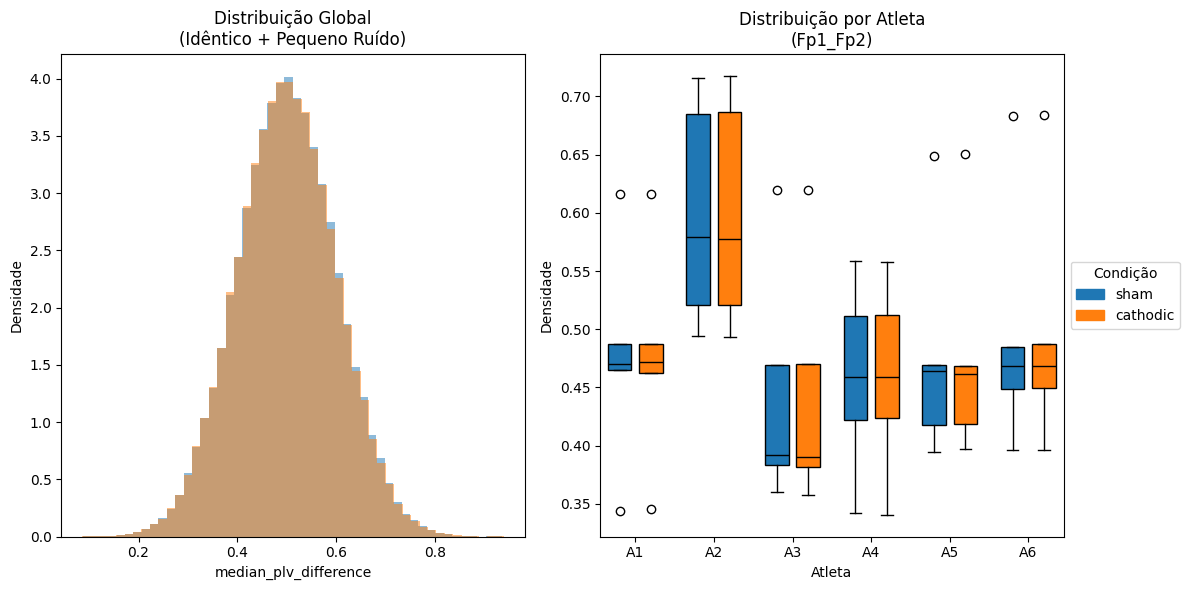

[SALVO] Gráfico salvo em synthetic_plv_results/idêntico_+_pequeno_ruído.png

=== Teste T para Idêntico + Pequeno Ruído ===
p-value: 0.9801377396



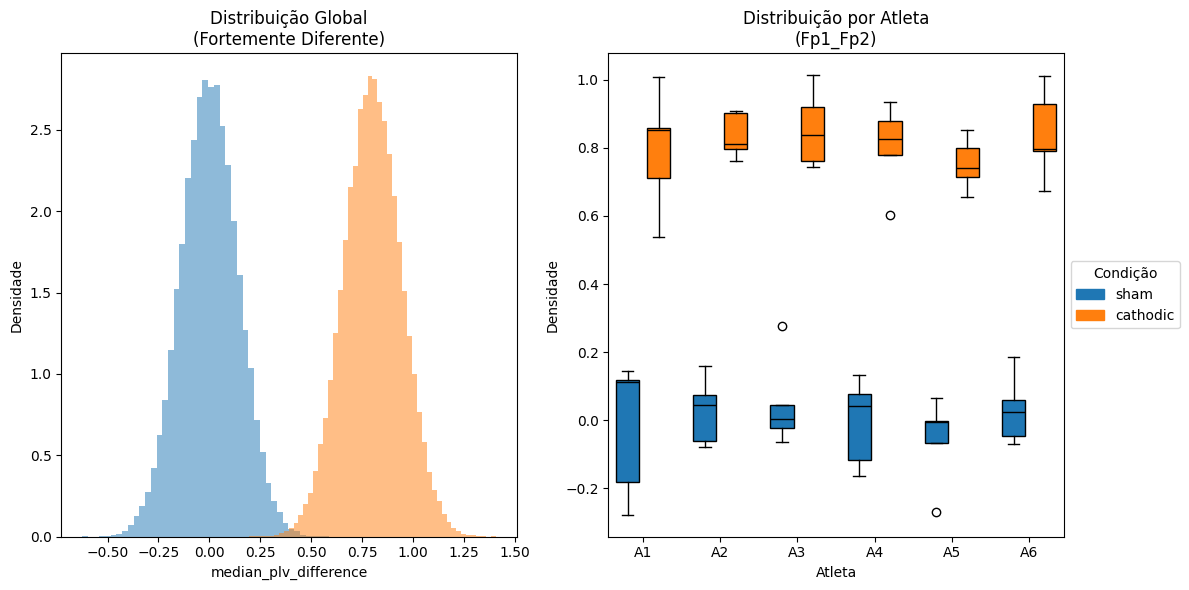

[SALVO] Gráfico salvo em synthetic_plv_results/fortemente_diferente.png

=== Teste T para Fortemente Diferente ===
p-value: 0.0000000000



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product, combinations
from scipy import stats

# Pasta para salvar as imagens
OUTPUT_FOLDER = "synthetic_plv_results"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

def generate_synthetic_data(
    mean_sham: float,
    mean_cathodic: float,
    std_dev: float,
    name: str,
    std_dev_intra: float = 0.1,
    std_dev_condition: float = 0.001
) -> pd.DataFrame:
    athletes = [f'A{i+1}' for i in range(6)]
    frequency_bands = ['theta', 'delta', 'alpha', 'beta', 'gamma']
    channels = [
        'Fpz', 'Fp1', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1',
        'Fz', 'F2', 'F4', 'F6', 'F8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2',
        'FC4', 'FC6', 'FT8', 'FT10', 'FFT7h', 'FFT8h', 'FTT7h', 'FTT8h', 'TTP7h', 'C5',
        'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'TTP8h', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1',
        'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'TPP7h', 'TPP8h', 'P7', 'P5', 'P3',
        'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1',
        'Oz', 'O2', 'ECG'
    ]
    channel_pairs = [f"{c1}_{c2}" for c1, c2 in combinations(channels, 2)]
    combos = list(product(frequency_bands, channel_pairs))

    # Valores-base para sham e cathodic
    sham_base = np.random.normal(mean_sham, std_dev, size=len(combos))
    cathodic_base = np.random.normal(mean_cathodic, std_dev, size=len(combos))

    rows = []
    for i, (fb, pair) in enumerate(combos):
        for athlete in athletes:
            # Ruído intra-indivíduo
            intra_noise = np.random.normal(0, std_dev_intra)

            # Valor final = base + ruído intra + ruído da condição
            sham_val = sham_base[i] + intra_noise + np.random.normal(0, std_dev_condition)
            cathodic_val = cathodic_base[i] + intra_noise + np.random.normal(0, std_dev_condition)

            rows.extend([
                {
                    'athlete': athlete, 'frequency_band': fb, 'channel_pair': pair,
                    'condition': 'sham', 'median_plv_difference': sham_val
                },
                {
                    'athlete': athlete, 'frequency_band': fb, 'channel_pair': pair,
                    'condition': 'cathodic', 'median_plv_difference': cathodic_val
                }
            ])

    df = pd.DataFrame(rows)
    df[['channel_1', 'channel_2']] = df['channel_pair'].str.split('_', expand=True)
    df['channel_pair_type'] = df['channel_pair'].apply(lambda x: "EEG_ECG" if "ECG" in x else "EEG_EEG")

    diff = df[df['condition'] == 'cathodic']['median_plv_difference'].values - \
           df[df['condition'] == 'sham']['median_plv_difference'].values
    print(f"[VALIDAÇÃO] Diferenças Cathodic-Sham: Média = {diff.mean():.4f}, SD = {diff.std():.4f}")

    df.to_csv(f'{OUTPUT_FOLDER}/synthetic_{name}.csv', index=False)
    return df

def analyze_distributions(df: pd.DataFrame, scenario_name: str):
    """Analisa e plota as distribuições dos dados gerados, usando somente Matplotlib."""
    # Definir cores consistentes para cada condição
    colors = {'sham': 'tab:blue', 'cathodic': 'tab:orange'}

    plt.figure(figsize=(12, 6))

    # ------------------ Subplot 1: Distribuição Global (Histogramas) ------------------
    plt.subplot(1, 2, 1)
    conditions = ['sham', 'cathodic']
    for condition in conditions:
        subset = df[df['condition'] == condition]['median_plv_difference']
        plt.hist(
            subset, bins=50, density=True, alpha=0.5,
            color=colors[condition], label=condition
        )
    plt.title(f"Distribuição Global\n({scenario_name})")
    plt.xlabel("median_plv_difference")
    plt.ylabel("Densidade")
    # Remove a legenda deste subplot
    # (Comentado: caso queira sumir completamente, basta não chamar plt.legend)
    # plt.legend(title="Condição", loc="upper right")

    # ------------------ Subplot 2: Boxplot por Atleta ------------------
    plt.subplot(1, 2, 2)
    sample_pair = 'Fp1_Fp2'
    subset = df[df['channel_pair'] == sample_pair]

    athletes_unique = subset['athlete'].unique()
    # Dados separados por condição e atleta
    data_sham = [
        subset[(subset['athlete'] == athlete) & (subset['condition'] == 'sham')]['median_plv_difference'].values
        for athlete in athletes_unique
    ]
    data_cathodic = [
        subset[(subset['athlete'] == athlete) & (subset['condition'] == 'cathodic')]['median_plv_difference'].values
        for athlete in athletes_unique
    ]

    # Definir posições para boxplots lado a lado
    positions = np.arange(len(athletes_unique)) * 2.0
    box_width = 0.6

    # Plot do sham
    bp_sham = plt.boxplot(
        data_sham, positions=positions - 0.4,
        widths=box_width, patch_artist=True,
        medianprops={'color': 'black'}  # mediana preta
    )

    for box in bp_sham['boxes']:
        box.set(facecolor=colors['sham'])

    # Plot do cathodic
    bp_cath = plt.boxplot(
        data_cathodic, positions=positions + 0.4,
        widths=box_width, patch_artist=True,
        medianprops={'color': 'black'}  # mediana preta
    )

    for box in bp_cath['boxes']:
        box.set(facecolor=colors['cathodic'])

    # Ajustes de eixos e rótulos
    plt.title(f"Distribuição por Atleta\n({sample_pair})")
    plt.xlabel("Atleta")
    plt.ylabel("Densidade")
    plt.xticks(positions, athletes_unique)

    # Criar legenda manual, para movê-la para fora do plot
    import matplotlib.patches as mpatches
    sham_patch = mpatches.Patch(color=colors['sham'], label='sham')
    cath_patch = mpatches.Patch(color=colors['cathodic'], label='cathodic')
    plt.legend(
        handles=[sham_patch, cath_patch],
        title="Condição",
        loc="center left",
        bbox_to_anchor=(1.0, 0.5)  # Move para fora do gráfico (lado direito)
    )

    # Layout e salvamento
    plt.tight_layout()
    filename = f"{OUTPUT_FOLDER}/{scenario_name.replace(' ', '_').lower()}.png"
    plt.savefig(filename, bbox_inches='tight')  # 'tight' garante que a legenda apareça
    plt.show()
    print(f"[SALVO] Gráfico salvo em {filename}")

# ------------------ Gerar e Analisar Cenários ------------------
almost_identical_df = generate_synthetic_data(
    mean_sham=0.5,
    mean_cathodic=0.5,
    std_dev=0.001,
    name='almost_identical',
)

strong_diff_df = generate_synthetic_data(
    mean_sham=0.0,
    mean_cathodic=0.8,
    std_dev=0.1,
    name='strong_diff',
)

for df, name in zip(
    [almost_identical_df, strong_diff_df],
    ['Idêntico + Pequeno Ruído', 'Fortemente Diferente']
):
    analyze_distributions(df, name)
    print(f"\n=== Teste T para {name} ===")
    sham = df[df['condition'] == 'sham']['median_plv_difference']
    cath = df[df['condition'] == 'cathodic']['median_plv_difference']
    t_stat, p_val = stats.ttest_ind(sham, cath)
    print(f"p-value: {p_val:.10f}\n")

In [ ]:
import pandas as pd

# Função para rodar a análise de bootstrap e salvar os resultados
def run_bootstrap_analysis(input_file, output_file, channel_pair_type):
    df = pd.read_csv(input_file)

    bootstrap_results = bootstrap_analysis(
        df=df,
        metric_column='median_plv_difference',
        channel_pair_type=channel_pair_type,
        grouped_by='pair',
        clustered=True,
        cluster_column='athlete',
        group_by_frequency_band=True,
        group_by_channel_group=True,
        n_iterations=10000,
        alpha=0.05,
        random_state=42
    )

    bootstrap_results.to_csv(output_file)
    print(f"[INFO] Bootstrap salvo com sucesso em {output_file}!")

# Rodando análises para EEG_EEG
run_bootstrap_analysis('synthetic_plv_results/synthetic_almost_identical.csv', 'bootstrap_synthetic_almost_identical_EEG.csv', 'EEG_EEG')
run_bootstrap_analysis('synthetic_plv_results/synthetic_strong_diff.csv', 'bootstrap_synthetic_strongly_different_EEG.csv', 'EEG_EEG')

# Rodando análises para EEG_ECG
run_bootstrap_analysis('synthetic_plv_results/synthetic_almost_identical.csv', 'bootstrap_synthetic_almost_identical_ECG.csv', 'EEG_ECG')
run_bootstrap_analysis('synthetic_plv_results/synthetic_strong_diff.csv', 'bootstrap_synthetic_strongly_different_ECG.csv', 'EEG_ECG')

Processing median_plv_difference (EEG_EEG): 100%|██████████| 12425/12425 [11:27<00:00, 18.07it/s]


DEBUG: bootstrap_analysis finalizada.
[INFO] Bootstrap salvo com sucesso em bootstrap_synthetic_almost_identical_EEG.csv!


Processing median_plv_difference (EEG_EEG): 100%|██████████| 12425/12425 [11:35<00:00, 17.86it/s]


DEBUG: bootstrap_analysis finalizada.
[INFO] Bootstrap salvo com sucesso em bootstrap_synthetic_strongly_different_EEG.csv!


Processing median_plv_difference (EEG_ECG): 100%|██████████| 355/355 [00:08<00:00, 39.96it/s]


DEBUG: bootstrap_analysis finalizada.
[INFO] Bootstrap salvo com sucesso em bootstrap_synthetic_almost_identical_ECG.csv!


Processing median_plv_difference (EEG_ECG): 100%|██████████| 355/355 [00:08<00:00, 42.34it/s]

DEBUG: bootstrap_analysis finalizada.
[INFO] Bootstrap salvo com sucesso em bootstrap_synthetic_strongly_different_ECG.csv!


In [ ]:
!zip -r synthetic_plv_results.zip synthetic_plv_results

  adding: synthetic_plv_results/ (stored 0%)
  adding: synthetic_plv_results/fortemente_diferente.png (deflated 16%)
  adding: synthetic_plv_results/idêntico_+_pequeno_ruído.png (deflated 17%)
  adding: synthetic_plv_results/synthetic_almost_identical.csv (deflated 76%)
  adding: synthetic_plv_results/synthetic_strong_diff.csv (deflated 76%)


In [ ]:
import pandas as pd

# Carregar os CSVs
df_with_outliers_pli_eeg = pd.read_csv('bootstrap_with_outliers_pli_eeg_eeg.csv')
df_without_outliers_pli_eeg = pd.read_csv('bootstrap_without_outliers_pli_eeg_eeg.csv')
df_with_outliers_cfplm_ecg = pd.read_csv('bootstrap_with_outliers_cfplm_eeg_ecg.csv')
df_without_outliers_cfplm_ecg = pd.read_csv('bootstrap_without_outliers_cfplm_eeg_ecg.csv')

# Definir o threshold para significância com base na correção Bonferroni
sig_threshold = 0.05

# Filtrar os casos significantes (com base no valor Bonferroni corrigido)
sig_with_outliers_pli_eeg = df_with_outliers_pli_eeg[df_with_outliers_pli_eeg['bonferroni_corrected_p'] < sig_threshold]
sig_without_outliers_pli_eeg = df_without_outliers_pli_eeg[df_without_outliers_pli_eeg['bonferroni_corrected_p'] < sig_threshold]

sig_with_outliers_cfplm_ecg = df_with_outliers_cfplm_ecg[df_with_outliers_cfplm_ecg['bonferroni_corrected_p'] < sig_threshold]
sig_without_outliers_cfplm_ecg = df_without_outliers_cfplm_ecg[df_without_outliers_cfplm_ecg['bonferroni_corrected_p'] < sig_threshold]

# Exibir o número de casos significantes para cada subset
print("PLI (EEG_EEG) com outliers mantidos: {} casos significantes".format(len(sig_with_outliers_pli_eeg)))
print("PLI (EEG_EEG) com outliers removidos: {} casos significantes".format(len(sig_without_outliers_pli_eeg)))
print("CF-PLM (EEG_ECG) com outliers mantidos: {} casos significantes".format(len(sig_with_outliers_cfplm_ecg)))
print("CF-PLM (EEG_ECG) com outliers removidos: {} casos significantes".format(len(sig_without_outliers_cfplm_ecg)))

PLI (EEG_EEG) com outliers mantidos: 378 casos significantes
PLI (EEG_EEG) com outliers removidos: 363 casos significantes
CF-PLM (EEG_ECG) com outliers mantidos: 11 casos significantes
CF-PLM (EEG_ECG) com outliers removidos: 11 casos significantes


In [ ]:
# Exibir os resultados significantes para cada subset (para copiar e colar o resultado)
print("\nResultados Significantes - PLI (EEG_EEG) com outliers mantidos:")
print(sig_with_outliers_pli_eeg)


Resultados Significantes - PLI (EEG_EEG) com outliers mantidos:
      Unnamed: 0  mean_difference      bias  std_error  bca_ci_lower  \
25            25        -0.035733 -0.000015   0.009703     -0.055267   
37            37        -0.046567  0.000117   0.020516     -0.093638   
43            43        -0.030033  0.000044   0.013909     -0.073867   
55            55        -0.037467  0.000037   0.010057     -0.063667   
83            83        -0.064100 -0.000016   0.012073     -0.090867   
...          ...              ...       ...        ...           ...   
9013        9013         0.031867  0.000042   0.007055      0.018833   
9048        9048        -0.015933  0.000008   0.008933     -0.040100   
9060        9060        -0.041433 -0.000118   0.013698     -0.071900   
9065        9065        -0.025000 -0.000009   0.006571     -0.041233   
9080        9080        -0.018200  0.000028   0.005034     -0.033367   

      bca_ci_upper  effect_size_cohen_d  effect_size_hedges_g  wilcoxo

In [ ]:
print("\nResultados Significantes - PLI (EEG_EEG) com outliers removidos:")
print(sig_without_outliers_pli_eeg)


Resultados Significantes - PLI (EEG_EEG) com outliers removidos:
      Unnamed: 0  mean_difference      bias  std_error  bca_ci_lower  \
25            25        -0.035733 -0.000015   0.009703     -0.055267   
37            37        -0.046567  0.000117   0.020516     -0.093638   
43            43        -0.015400 -0.000018   0.004680     -0.026765   
54            54        -0.037467  0.000037   0.010057     -0.063667   
82            82        -0.064100 -0.000016   0.012073     -0.090867   
...          ...              ...       ...        ...           ...   
7723        7723        -0.041433 -0.000118   0.013698     -0.071900   
7727        7727        -0.022480  0.000013   0.007287     -0.045720   
7739        7739        -0.018200  0.000028   0.005034     -0.033367   
7795        7795        -0.033420 -0.000016   0.005849     -0.045960   
7825        7825         0.041560 -0.000042   0.013231      0.020280   

      bca_ci_upper  effect_size_cohen_d  effect_size_hedges_g  wilcox

In [ ]:
print("\nResultados Significantes - CF-PLM (EEG_ECG) com outliers mantidos:")
print(sig_with_outliers_cfplm_ecg)


Resultados Significantes - CF-PLM (EEG_ECG) com outliers mantidos:
     Unnamed: 0  mean_difference      bias  std_error  bca_ci_lower  \
71           71        -0.010771 -0.000024   0.001949     -0.014820   
73           73        -0.010325 -0.000045   0.003766     -0.018717   
75           75        -0.006502 -0.000002   0.002200     -0.011902   
119         119        -0.008106 -0.000024   0.002425     -0.012826   
134         134        -0.021638  0.000038   0.007405     -0.038524   
150         150        -0.017921  0.000007   0.006665     -0.033097   
159         159        -0.021659 -0.000008   0.008232     -0.043446   
161         161        -0.018171  0.000006   0.007028     -0.035134   
165         165        -0.016120 -0.000003   0.007503     -0.034968   
195         195        -0.001947  0.000007   0.000956     -0.004905   
267         267         0.010870  0.000031   0.003072      0.005007   

     bca_ci_upper  effect_size_cohen_d  effect_size_hedges_g  wilcoxon_stat  \


In [ ]:
print("\nResultados Significantes - CF-PLM (EEG_ECG) com outliers removidos:")
print(sig_without_outliers_cfplm_ecg)


Resultados Significantes - CF-PLM (EEG_ECG) com outliers removidos:
     Unnamed: 0  mean_difference      bias  std_error  bca_ci_lower  \
71           71        -0.010771 -0.000024   0.001949     -0.014820   
73           73        -0.010325 -0.000045   0.003766     -0.018717   
75           75        -0.006502 -0.000002   0.002200     -0.011902   
119         119        -0.008106 -0.000024   0.002425     -0.012826   
134         134        -0.021638  0.000038   0.007405     -0.038524   
150         150        -0.017921  0.000007   0.006665     -0.033097   
159         159        -0.021659 -0.000008   0.008232     -0.043446   
161         161        -0.018171  0.000006   0.007028     -0.035134   
165         165        -0.016120 -0.000003   0.007503     -0.034968   
195         195        -0.001947  0.000007   0.000956     -0.004905   
267         267         0.010870  0.000031   0.003072      0.005007   

     bca_ci_upper  effect_size_cohen_d  effect_size_hedges_g  wilcoxon_stat  \

In [ ]:
def create_summary_table(df, group_name):
    # Verificar se há dados para cada banda
    if df.empty:
        return pd.DataFrame()

    # Criar o summary básico
    summary = df.groupby('frequency_band').agg({
        'mean_difference': ['count', 'mean', 'std', 'median'],
        'effect_size_hedges_g': ['mean', 'median'],
        'wilcoxon_rbc': ['mean', 'median'],
        'bca_ci_lower': 'mean',
        'bca_ci_upper': 'mean'
    }).round(4)

    # Calcular % de efeitos positivos por banda com tratamento para divisão por zero
    pos_effects = df[df['mean_difference'] > 0].groupby('frequency_band').size()
    total_effects = df.groupby('frequency_band').size()

    # Garantir que todas as bandas tenham um valor para percent_positive
    all_bands = df['frequency_band'].unique()
    percent_positive = pd.Series(0.0, index=all_bands)

    for band in all_bands:
        if band in total_effects and total_effects[band] > 0:
            pos = pos_effects[band] if band in pos_effects else 0
            percent_positive[band] = (pos / total_effects[band] * 100).round(1)
        else:
            percent_positive[band] = 0.0

    # Adicionar coluna de porcentagem de efeitos positivos
    summary['percent_positive'] = percent_positive

    # Renomear as colunas para mais clareza
    summary.columns = [
        'n_significant',
        'mean_diff',
        'std_diff',
        'median_diff',
        'mean_hedges_g',
        'median_hedges_g',
        'mean_rbc',
        'median_rbc',
        'ci_lower',
        'ci_upper',
        'percent_positive'
    ]

    # Preencher possíveis NaN remanescentes com 0
    summary = summary.fillna(0)

    return summary

# Criar resumos
summary_eeg_eeg_with = create_summary_table(sig_with_outliers_pli_eeg, "EEG-EEG (com outliers)")
summary_eeg_eeg_without = create_summary_table(sig_without_outliers_pli_eeg, "EEG-EEG (sem outliers)")
summary_eeg_ecg_with = create_summary_table(sig_with_outliers_cfplm_ecg, "EEG-ECG (com outliers)")
summary_eeg_ecg_without = create_summary_table(sig_without_outliers_cfplm_ecg, "EEG-ECG (sem outliers)")

# Exibir todos os resumos
print("\nEEG-ECG com outliers:")
print(summary_eeg_ecg_with)

print("\nEEG-ECG sem outliers:")
print(summary_eeg_ecg_without)

print("\nEEG-EEG com outliers:")
print(summary_eeg_eeg_with)

print("\nEEG-EEG sem outliers:")
print(summary_eeg_eeg_without)


EEG-ECG com outliers:
                n_significant  mean_diff  std_diff  median_diff  \
frequency_band                                                    
beta                        4    -0.0089    0.0020      -0.0092   
delta                       5    -0.0191    0.0025      -0.0182   
gamma                       1    -0.0019    0.0000      -0.0019   
theta                       1     0.0109    0.0000       0.0109   

                mean_hedges_g  median_hedges_g  mean_rbc  median_rbc  \
frequency_band                                                         
beta                  -1.0836          -0.9366    0.9524      0.9524   
delta                 -0.7741          -0.7823    0.9429      0.9048   
gamma                 -0.6054          -0.6054    1.0000      1.0000   
theta                  1.0521           1.0521   -1.0000     -1.0000   

                ci_lower  ci_upper  percent_positive  
frequency_band                                        
beta             -0.0146   -0.0

In [ ]:
# Salvar em CSVs
summary_eeg_ecg_with.to_csv('summary_eeg_ecg_with_outliers.csv')
summary_eeg_ecg_without.to_csv('summary_eeg_ecg_without_outliers.csv')
summary_eeg_eeg_with.to_csv('summary_eeg_eeg_with_outliers.csv')
summary_eeg_eeg_without.to_csv('summary_eeg_eeg_without_outliers.csv')

# Função para formatar tabela LaTeX
def to_latex_with_caption(df, caption, label):
    latex_table = df.to_latex(float_format="%.4f")
    latex_table = latex_table.replace("\\begin{tabular}", "\\begin{table}[htbp]\n\\centering\n\\begin{tabular}")
    latex_table = latex_table.replace("\\end{tabular}", "\\end{tabular}\n\\caption{" + caption + "}\n\\label{tab:" + label + "}\n\\end{table}")
    return latex_table

# Salvar em TEX
with open('summary_eeg_ecg_with_outliers.tex', 'w') as f:
    f.write(to_latex_with_caption(
        summary_eeg_ecg_with,
        "Estatísticas sumárias para EEG-ECG com outliers",
        "summary_eeg_ecg_with"
    ))

with open('summary_eeg_ecg_without_outliers.tex', 'w') as f:
    f.write(to_latex_with_caption(
        summary_eeg_ecg_without,
        "Estatísticas sumárias para EEG-ECG sem outliers",
        "summary_eeg_ecg_without"
    ))

with open('summary_eeg_eeg_with_outliers.tex', 'w') as f:
    f.write(to_latex_with_caption(
        summary_eeg_eeg_with,
        "Estatísticas sumárias para EEG-EEG com outliers",
        "summary_eeg_eeg_with"
    ))

with open('summary_eeg_eeg_without_outliers.tex', 'w') as f:
    f.write(to_latex_with_caption(
        summary_eeg_eeg_without,
        "Estatísticas sumárias para EEG-EEG sem outliers",
        "summary_eeg_eeg_without"
    ))

In [ ]:
# import pandas as pd


# def analyze_bootstrap_results_bonferroni(df):
#     """
#     Analisa os resultados do bootstrap usando o p-value corrigido por Bonferroni.
#     Define significância como bonferroni_corrected_p < 0.05.
#     Exibe estatísticas resumidas e armazena channel_pairs e atletas significativos para verificação posterior.
#     """
#     # Define uma nova coluna de significância com base no bonferroni_corrected_p
#     df['significant_bonf'] = df['bonferroni_corrected_p'] < 0.05

#     # Total de grupos
#     total_groups = len(df)
#     signif_groups = df['significant_bonf'].sum()
#     signif_pct = (signif_groups / total_groups) * 100
#     print("==== Análise de Resultados do Bootstrap (Bonferroni) ====\n")
#     print(f"Total de grupos analisados: {total_groups}")
#     print(f"Grupos significativos (bonferroni_corrected_p < 0.05): {signif_groups} ({signif_pct:.2f}%)\n")

#     # Estatísticas dos p-values corrigidos
#     bonf_pvals = df['bonferroni_corrected_p']
#     print("=== Estatísticas dos p-values (Bonferroni) ===")
#     print(f"Min p-value corrigido: {bonf_pvals.min():.6f}")
#     print(f"Max p-value corrigido: {bonf_pvals.max():.6f}")
#     print(f"Mean p-value corrigido: {bonf_pvals.mean():.6f}")
#     print(f"Median p-value corrigido: {bonf_pvals.median():.6f}\n")

#     # Estatísticas por banda
#     print("=== Estatísticas de bonferroni_corrected_p por frequency_band ===")
#     stats_by_band = df.groupby('frequency_band')['bonferroni_corrected_p'].agg(['mean', 'median', 'min', 'max', 'count'])
#     print(stats_by_band, "\n")

#     # Estatísticas por channel_pair_type (opcional)
#     print("=== Estatísticas de bonferroni_corrected_p por channel_pair_type ===")
#     stats_by_type = df.groupby('channel_pair_type')['bonferroni_corrected_p'].agg(['mean', 'median', 'min', 'max', 'count'])
#     print(stats_by_type, "\n")

#     # Lista de channel_pairs e atletas significativos
#     df_significant = df[df['significant_bonf']]

#     # Extraindo informações para análise
#     significant_channel_pairs = df_significant['channel_pair'].unique().tolist()
#     significant_athletes = df_significant['channel_pair'].apply(lambda x: x.split("_")[0]).unique().tolist()

#     # Salvar os dados para conferência posterior
#     df_significant[['channel_pair', 'frequency_band', 'bonferroni_corrected_p']].to_csv("significant_pairs.csv", index=False)

#     print("=== Lista de Channel Pairs Significativos ===")
#     print(significant_channel_pairs, "\n")

#     print("=== Lista de Atletas Associados aos Channel Pairs Significativos ===")
#     print(significant_athletes, "\n")

#     # Top 5 menores p-values corrigidos
#     print("=== Top 5 menores bonferroni_corrected_p ===")
#     smallest_5 = df_significant.nsmallest(5, 'bonferroni_corrected_p')
#     print(smallest_5[['channel_pair', 'frequency_band', 'bonferroni_corrected_p']].to_string(index=False), "\n")

#     # Top 5 maiores p-values corrigidos
#     print("=== Top 5 maiores bonferroni_corrected_p ===")
#     largest_5 = df.nlargest(5, 'bonferroni_corrected_p')
#     print(largest_5[['channel_pair', 'frequency_band', 'bonferroni_corrected_p']].to_string(index=False), "\n")

#     print("==== Fim da Análise ====\n")

#     return significant_channel_pairs, significant_athletes


# df_filename = 'bootstrap_with_outliers_cfplm_eeg_ecg.csv'
# df = pd.read_csv(df_filename)
# subtitle = 'Dados Sintéticos Próximos (EEG-EEG)'
# df[['channel_1', 'channel_2']] = df['channel_pair'].str.split('_', expand=True)
# significant_pairs, significant_athletes = analyze_bootstrap_results_bonferroni(df)

# # Agora podemos usar 'significant_pairs' para verificar no df_simulated:
# df_simulated = pd.read_csv("synthetic_plv_results/synthetic_almost_identical.csv")

# # Filtrar o df_simulated para verificar se há diferença real nesses channel_pairs
# df_check = df_simulated[df_simulated['channel_pair'].isin(significant_pairs)]
# df_check.to_csv("simulated_significant_check.csv", index=False)

# print(f"[INFO] Foram encontrados {len(df_check)} registros no dataset simulado para análise.")
# df_check

==== Análise de Resultados do Bootstrap (Bonferroni) ====

Total de grupos analisados: 305
Grupos significativos (bonferroni_corrected_p < 0.05): 11 (3.61%)

=== Estatísticas dos p-values (Bonferroni) ===
Min p-value corrigido: 0.000000
Max p-value corrigido: 1.000000
Mean p-value corrigido: 0.942590
Median p-value corrigido: 1.000000

=== Estatísticas de bonferroni_corrected_p por frequency_band ===
                    mean  median    min  max  count
frequency_band                                     
alpha           0.995607     1.0  0.732  1.0     61
beta            0.874066     1.0  0.000  1.0     61
delta           0.876066     1.0  0.000  1.0     61
gamma           0.983607     1.0  0.000  1.0     61
theta           0.983607     1.0  0.000  1.0     61 

=== Estatísticas de bonferroni_corrected_p por channel_pair_type ===
                      mean  median  min  max  count
channel_pair_type                                  
EEG_ECG            0.94259     1.0  0.0  1.0    305 

===

FileNotFoundError: [Errno 2] No such file or directory: 'synthetic_plv_results/synthetic_almost_identical.csv'

A simulação demonstra que o método bootstrap (usando o intervalo de confiança BCa) está funcionando conforme o esperado, mesmo em um cenário onde as condições (sham e cathodic) são praticamente idênticas. Eis uma explicação detalhada:

1. **Sensibilidade do Bootstrap com Amostras Pequenas:**  
   Quando se trabalha com um número reduzido de observações (no seu caso, 6 por condição para cada combinação de channel_pair e frequency_band), mesmo pequenas flutuações aleatórias – que podem surgir naturalmente do ruído intra-atleta – podem ser capturadas pelo método bootstrap. Esses pequenos desvios, embora clinicamente irrelevantes, podem levar a intervalos de confiança que não incluem zero. Isso é uma consequência da alta sensibilidade dos métodos não paramétricos, como o BCa (bias-corrected and accelerated), quando aplicado a amostras pequenas. Como discutido por Efron e Tibshirani (1993) em *An Introduction to the Bootstrap*, o método é projetado para capturar a variabilidade observada na amostra, mesmo que essa variabilidade seja mínima.

2. **Correção para Múltiplas Comparações:**  
   Quando você aplica uma correção rigorosa como a de Bonferroni em um conjunto grande de grupos (no seu caso, 355 grupos), mesmo uma taxa de falso positivo próxima ao nível nominal de 5% pode resultar em aproximadamente 5% dos testes (ou até um pouco mais, dependendo da variabilidade) sendo "significativos" por acaso. Isso é coerente com a literatura estatística – por exemplo, Davison e Hinkley (1997) em *Bootstrap Methods and Their Application* destacam que, em situações com múltiplas comparações, pequenas flutuações podem ser realçadas e levar a resultados estatísticos "significativos" mesmo quando a diferença real é desprezível.

3. **Interpretação dos Resultados:**  
   Nos seus dados simulados, mesmo que a média base para sham e cathodic seja idêntica, o ruído adicionado independentemente para cada observação introduz pequenas variações. O bootstrap, devido à sua natureza de reamostragem, capta essas variações e, ao calcular intervalos de confiança, em alguns grupos o intervalo não inclui zero, levando a um resultado “significativo”. Isso não significa que o método esteja falhando; na verdade, ele está detectando com alta precisão as variações presentes nos dados. Essa sensibilidade é desejável em muitos contextos, mas é importante interpretar os resultados considerando que diferenças tão pequenas (geralmente na ordem de 10^-3) podem não ter relevância prática, mesmo sendo estatisticamente significativas.

4. **O Método Mais Robusto Possível?**  
   O bootstrap BCa é amplamente reconhecido como um dos métodos não paramétricos mais robustos para estimar intervalos de confiança, justamente porque ele ajusta o viés e a aceleração, tornando-o adequado para amostras pequenas e distribuições não normais. No entanto, sua alta sensibilidade também pode ser uma desvantagem em cenários onde se espera que as condições sejam idênticas. Para dados reais, a robustez do método dependerá, em parte, do tamanho da amostra e da variabilidade intrínseca dos dados. Se o seu objetivo é minimizar a detecção de falsos positivos em condições praticamente idênticas, você pode considerar:

- **Aumentar o tamanho da amostra:** Incluir mais observações (por exemplo, mais atletas ou mais repetições) aumenta o erro padrão e pode reduzir a detecção de diferenças insignificantes.
- **Usar correções alternativas para múltiplas comparações:** Em vez da correção Bonferroni, métodos como o FDR (False Discovery Rate) podem ser menos conservadores e adequados quando se espera um baixo nível de verdadeiro efeito.
- **Revisar a modelagem do ruído:** Garantir que o ruído intra-atleta reflita realisticamente a variabilidade nos dados reais pode ajudar a evitar a amplificação de pequenas variações aleatórias.

Citações de Literatura

- **Efron, B. & Tibshirani, R. J. (1993). "An Introduction to the Bootstrap."**  
  Este livro é um marco na utilização de métodos de reamostragem. Ele descreve como o bootstrap pode ser usado para inferência estatística sem a necessidade de suposições paramétricas rígidas, mas também enfatiza que, com amostras pequenas, o método pode captar pequenas flutuações nos dados.

- **Davison, A. C. & Hinkley, D. V. (1997). "Bootstrap Methods and Their Application."**  
  Nesta obra, os autores discutem as propriedades do bootstrap, inclusive a abordagem BCa, e como ele pode ser sensível a variações pequenas em contextos de amostras pequenas. Eles também abordam os desafios de correções de múltiplas comparações e como isso pode afetar a interpretação dos resultados.

### Bootstrap results plotting

In [ ]:
# Load CSV from Google Drive
import pandas as pd
csv_file_id = '1-n3v7-WBFnHIN6tjn95RekQ_JL7ZRZH1'

subtitle = 'PLI_EEG-EGG_Sem_Outliers'


request = service.files().get_media(fileId=csv_file_id)
fh = io.BytesIO()
downloader = MediaIoBaseDownload(fh, request)
done = False
while not done:
    status, done = downloader.next_chunk()
    print(f"Download {int(status.progress() * 100)}% completed.")
fh.seek(0)

# Load CSV into a pandas DataFrame
df = pd.read_csv(fh)
df[['channel_1', 'channel_2']] = df['channel_pair'].str.split('_', expand=True)
df

Download 100% completed.


Unnamed: 0  mean_difference      bias  std_error  bca_ci_lower  \
0              0         0.002080  0.000033   0.010516     -0.023880   
1              1        -0.018800  0.000145   0.018387     -0.051100   
2              2        -0.002700  0.000191   0.018304     -0.033867   
3              3        -0.020833  0.000066   0.022529     -0.079967   
4              4        -0.004533  0.000078   0.016239     -0.037133   
...          ...              ...       ...        ...           ...   
7836        7836         0.027240 -0.000134   0.059565     -0.077196   
7837        7837         0.004360 -0.000233   0.061891     -0.085760   
7838        7838        -0.040560 -0.000053   0.033095     -0.131240   
7839        7839         0.043960  0.000114   0.037726     -0.026480   
7840        7840         0.016000 -0.000066   0.031269     -0.040464   

      bca_ci_upper  effect_size_cohen_d  effect_size_hedges_g  wilcoxon_stat  \
0         0.017960             0.078930              0.057404            5.0   
1         0.020767            -0.380102             -0.304081            6.0   
2         0.036700            -0.055526             -0.044421            9.0   
3         0.013367            -0.343649             -0.274919            8.0   
4         0.025300            -0.105110             -0.084088           10.0   
...            ...                  ...                   ...            ...   
7836      0.161840             0.182172              0.132488            6.0   
7837      0.142560             0.028041              0.020393            5.0   
7838      0.012080            -0.488618             -0.355359            5.0   
7839      0.116720             0.463107              0.336805            6.0   
7840      0.084320             0.204001              0.148364            6.0   

      wilcoxon_rbc  p_value  significant channel_pair frequency_band  \
0        -0.333333   0.7752        False      AF3_AF4          alpha   
1         0.428571   0.3164        False      AF3_AFz          alpha   
2         0.142857   0.8926        False       AF3_C1          alpha   
3         0.238095   0.3728        False       AF3_C2          alpha   
4         0.047619   0.8108        False       AF3_C5          alpha   
...            ...      ...          ...          ...            ...   
7836     -0.200000   0.6540        False       P5_PO7          delta   
7837      0.333333   0.8834        False        Pz_F5          delta   
7838      0.333333   0.2098        False      TP9_CP1          delta   
7839     -0.200000   0.2028        False       TP9_O1          delta   
7840     -0.200000   0.6366        False       TP9_P1          delta   

     channel_pair_type  bonferroni_corrected_p  fdr_corrected_p channel_1  \
0              EEG_EEG                     1.0         0.952818       AF3   
1              EEG_EEG                     1.0         0.749372       AF3   
2              EEG_EEG                     1.0         0.969098       AF3   
3              EEG_EEG                     1.0         0.795186       AF3   
4              EEG_EEG                     1.0         0.958213       AF3   
...                ...                     ...              ...       ...   
7836           EEG_EEG                     1.0         0.932959        P5   
7837           EEG_EEG                     1.0         0.966747        Pz   
7838           EEG_EEG                     1.0         0.639348       TP9   
7839           EEG_EEG                     1.0         0.630014       TP9   
7840           EEG_EEG                     1.0         0.932959       TP9   

     channel_2  
0          AF4  
1          AFz  
2           C1  
3           C2  
4           C5  
...        ...  
7836       PO7  
7837        F5  
7838       CP1  
7839        O1  
7840        P1  

[7841 rows x 19 columns]

In [ ]:
# df = pd.read_csv("bootstrap_synthetic_almost_identical_EEG.csv")
# df[['channel_1', 'channel_2']] = df['channel_pair'].str.split('_', expand=True)

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# Lista das bandas de frequência
FREQUENCY_BANDS = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# Cria a pasta para salvar as imagens
output_dir = f"centrality_graphs/{subtitle}"
os.makedirs(output_dir, exist_ok=True)

# Filtra o DataFrame para manter apenas as ocorrências significativas
df_significant_all = df[df["bonferroni_corrected_p"] <= 0.05]

def plot_graph(G, centrality_metric, title, cmap="viridis", layout_type="kamada_kawai"):
    fig, ax = plt.subplots(figsize=(15, 12))

    if layout_type == "spring":
        pos = nx.spring_layout(G, k=0.6, iterations=100)
    elif layout_type == "kamada_kawai":
        pos = nx.kamada_kawai_layout(G, weight=None, scale=3)
    else:
        pos = nx.circular_layout(G)

    node_sizes = [v * 8000 for v in centrality_metric.values()]
    node_colors = list(centrality_metric.values())

    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color="gray", ax=ax)
    nx.draw_networkx_nodes(G, pos,
                           node_size=node_sizes,
                           node_color=node_colors,
                           cmap=cmap,
                           alpha=0.9,
                           ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10)

    ax.set_title(title, fontsize=18)

    sm = plt.cm.ScalarMappable(cmap=cmap,
                               norm=plt.Normalize(vmin=min(node_colors),
                                                  vmax=max(node_colors)))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label="Centralidade")

    ax.axis("off")

    filename = f"{output_dir}/{title.replace(' ', '_').replace('-', '').replace(':', '')}.png"
    plt.savefig(filename, bbox_inches="tight", dpi=300)
    plt.show()
    plt.close()
    print(f"[INFO] Imagem salva em {filename}")

# Loop para cada banda de frequência
for band in FREQUENCY_BANDS:
    df_band = df_significant_all[df_significant_all['frequency_band'] == band]
    print(f"Banda {band}: {len(df_band)} ocorrências significativas.")
    if df_band.empty:
        print(f"[INFO] Nenhum dado significativo para a banda {band}.")
        continue

    # Cria o grafo a partir dos dados filtrados
    G = nx.Graph()
    for _, row in df_band.iterrows():
        ch1, ch2 = row["channel_pair"].split("_")
        w = abs(row["mean_difference"])
        if w == 0:
            w = 1e-6  # Evita peso zero
        G.add_edge(ch1, ch2, weight=w)

    # Calcula as medidas de centralidade
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

    # Gera os plots para a banda atual
    plot_graph(G, degree_centrality, f"Degree Centrality - {band} - {subtitle}", cmap="coolwarm", layout_type="kamada_kawai")
    plot_graph(G, betweenness_centrality, f"Betweenness Centrality - {band} - {subtitle}", cmap="coolwarm", layout_type="kamada_kawai")
    plot_graph(G, eigenvector_centrality, f"Eigenvector Centrality - {band} - {subtitle}", cmap="coolwarm", layout_type="kamada_kawai")

    print("Degree Centrality:", degree_centrality)
    print("Betweenness Centrality:", betweenness_centrality)
    print("Eigenvector Centrality:", eigenvector_centrality)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.to_csv('df.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
import os

# Cria a pasta para salvar a imagem
output_dir = "effect_size_histograms"
os.makedirs(output_dir, exist_ok=True)

THRESHOLDS = {
    'effect_size_cohen_d': {'low': 0.2, 'medium': 0.5, 'high': 0.8},
    'effect_size_hedges_g': {'low': 0.2, 'medium': 0.5, 'high': 0.8},
    'wilcoxon_rbc': {'low': 0.1, 'medium': 0.3, 'high': 0.5}
}
P_VALUE_THRESHOLD = 0.05
SIGNIFICANT_COLOR = 'red'
DEFAULT_COLOR = 'gray'

EFFECT_SIZE_COLORS = {
    'low': '#1f77b4',
    'medium': '#ff7f0e',
    'high': '#2ca02c'
}

def plot_histogram(ax, data, highlight, column, title, thresholds=None):
    sns.histplot(data[column], bins=50, kde=True, color=DEFAULT_COLOR, ax=ax, label='Não Significativo')
    sns.histplot(highlight[column], bins=50, kde=True, color=SIGNIFICANT_COLOR, ax=ax, label='Significativo')

    if thresholds:
        for key, val in thresholds.items():
            ax.axvline(val, color=EFFECT_SIZE_COLORS[key], linestyle='--', label=f'{key}')
            ax.axvline(-val, color=EFFECT_SIZE_COLORS[key], linestyle='--')

    ax.set(title=title, xlabel=column, ylabel='Frequency')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

def plot_p_values(ax, data, highlight, column, title):
    plot_histogram(ax, data, highlight, column, title)
    ax.axvline(P_VALUE_THRESHOLD, color='red', linestyle='--', label='p=0.05')
    ax.set_xlim(0, 1)

# --- Preparar os Dados ---
df_corrected = df[df['bonferroni_corrected_p'] < P_VALUE_THRESHOLD]
ymax = max(np.histogram(df[col], bins=50)[0].max() for col in THRESHOLDS)

# --- Plots ---
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot de distribuições
for ax, col, title in zip(axes[0], THRESHOLDS.keys(), ["Cohen's d", "Hedges' g", "Wilcoxon RBC"]):
    plot_histogram(ax, df, df_corrected, col, title, THRESHOLDS[col])

# Plot de p-valores
plot_p_values(axes[1, 0], df, df_corrected, 'p_value', "Raw p-values")
plot_p_values(axes[1, 1], df, df_corrected, 'bonferroni_corrected_p', "Bonferroni p-values")

# Boxplot por banda de frequência
sns.boxplot(data=df, x='frequency_band', y='p_value', ax=axes[1, 2], color=DEFAULT_COLOR)
sns.stripplot(data=df_corrected, x='frequency_band', y='p_value', ax=axes[1, 2], color=SIGNIFICANT_COLOR, size=4)
axes[1, 2].axhline(P_VALUE_THRESHOLD, color='red', linestyle='--', label='p=0.05')
axes[1, 2].set(title="P-values by Frequency Band", xlabel='Frequency Band', ylabel='p-value')

# Legenda personalizada
legend_elements = [
    Patch(facecolor=SIGNIFICANT_COLOR, label='Significativo (Bonferroni < 0.05)'),
    Patch(facecolor=DEFAULT_COLOR, label='Não Significativo (Bonferroni ≥ 0.05)'),
    Patch(facecolor=EFFECT_SIZE_COLORS['low'], label='Low'),
    Patch(facecolor=EFFECT_SIZE_COLORS['medium'], label='Medium'),
    Patch(facecolor=EFFECT_SIZE_COLORS['high'], label='High')
]
axes[1, 2].legend(handles=legend_elements, title="Legenda", loc='upper right')

plt.tight_layout()

# Salvar a imagem
filename = f"{output_dir}/Effect_Size_Histograms_{subtitle.replace(' ', '_').replace('-', '').replace(':', '')}.png"
plt.savefig(filename, bbox_inches="tight", dpi=300)
plt.close()
print(f"[INFO] Imagem salva em {filename}")

[INFO] Imagem salva em effect_size_histograms/Effect_Size_Histograms_PLI_EEGEGG_Sem_Outliers.png


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch, Patch
import os

# Criação da pasta para salvar as imagens
output_dir = f"network_graphs/{subtitle}"
os.makedirs(output_dir, exist_ok=True)

# Define channel positions
channel_positions = {
        'Fpz': (0, 4), 'Fp1': (-1, 4), 'Fp2': (1, 4),
        'AF7': (-3, 3), 'AF3': (-2, 3), 'AFz': (0, 3), 'AF4': (2, 3), 'AF8': (3, 3),
        'F7': (-4, 2), 'F5': (-3, 2), 'F3': (-2, 2), 'F1': (-1, 2), 'Fz': (0, 2), 'F2': (1, 2), 'F4': (2, 2), 'F6': (3, 2), 'F8': (4, 2),
        'FT9': (-5, 1), 'FT7': (-4, 1), 'FC5': (-3, 1), 'FC3': (-2, 1), 'FC1': (-1, 1), 'FCz': (0, 1), 'FC2': (1, 1), 'FC4': (2, 1), 'FC6': (3, 1), 'FT8': (4, 1), 'FT10': (5, 1),
        'FFT7h': (-4.5, 1.5), 'FFT8h': (4.5, 1.5), # Posições ajustadas para FFT7h e FFT8h
        'FTT7h': (-4.5, 0.5), 'FTT8h': (4.5, 0.5), # Posições ajustadas para FTT7h e FTT8h
        'TTP7h': (-4, 0), 'C5': (-3, 0), 'C3': (-2, 0), 'C1': (-1, 0), 'Cz': (0, 0), 'C2': (1, 0), 'C4': (2, 0), 'C6': (3, 0), 'TTP8h': (4, 0),
        'TP9': (-5, -1), 'TP7': (-4, -1), 'CP5': (-3, -1), 'CP3': (-2, -1), 'CP1': (-1, -1), 'CPz': (0, -1), 'CP2': (1, -1), 'CP4': (2, -1), 'CP6': (3, -1), 'TP8': (4, -1), 'TP10': (5, -1),
        'TPP7h': (-4.5, -1.5), 'TPP8h': (4.5, -1.5), # Posições ajustadas para TPP7h e TPP8h
        'P7': (-4, -2), 'P5': (-3, -2), 'P3': (-2, -2), 'P1': (-1, -2), 'Pz': (0, -2), 'P2': (1, -2), 'P4': (2, -2), 'P6': (3, -2), 'P8': (4, -2),
        'PO7': (-3, -3), 'PO3': (-2, -3), 'POz': (0, -3), 'PO4': (2, -3), 'PO8': (3, -3),
        'O1': (-2, -4), 'Oz': (0, -4), 'O2': (2, -4),
        'ECG': (0, -6),
    }

# Definição de bandas de frequência e cores
FREQUENCY_BANDS = {
    'delta': 'orange',
    'theta': 'blue',
    'alpha': 'green',
    'beta': 'red',
    'gamma': 'purple'
}


# Filtrar dados com base no modo
def filter_data(df, mode):
    if mode == 'all':
        return df
    elif mode in FREQUENCY_BANDS:
        return df[df['frequency_band'] == mode]
    elif mode == 'positive':
        return df[df['mean_difference'] > 0]
    elif mode == 'negative':
        return df[df['mean_difference'] < 0]
    return df

# Contar conexões significativas
def count_significant_connections(df):
    significant_df = df[df['bonferroni_corrected_p'] <= 0.05]
    counts = pd.concat([significant_df['channel_1'], significant_df['channel_2']]).value_counts()
    return counts

# Adicionar nós e arestas ao grafo
def add_nodes_and_edges(G, df, channel_positions, mode):
    for _, row in df.iterrows():
        ch1, ch2 = row['channel_1'], row['channel_2']
        bonferroni_p = row['bonferroni_corrected_p']

        if mode in FREQUENCY_BANDS:
            rbc_value = row['wilcoxon_rbc']
            norm_rbc = (rbc_value + 1) / 2
            edge_color = plt.cm.bwr(norm_rbc)
        else:
            edge_color = FREQUENCY_BANDS.get(row['frequency_band'], 'gray')

        if ch1 not in G:
            G.add_node(ch1, pos=channel_positions.get(ch1, (0, 0)), color='lightgray')
        if ch2 not in G:
            G.add_node(ch2, pos=channel_positions.get(ch2, (0, 0)), color='lightgray')

        if bonferroni_p <= 0.05:
            G.add_edge(ch1, ch2, color=edge_color)

# Desenhar e salvar o grafo
def draw_network(G, pos, significant_counts, title, mode):
    plt.figure(figsize=(15, 10))
    ax = plt.gca()

    if mode in FREQUENCY_BANDS:
        node_colors = [
            plt.cm.bwr((G.nodes[node].get('wilcoxon_rbc', 0) + 1) / 2)
            for node in G.nodes
        ]
    else:
        node_colors = [G.nodes[node]['color'] for node in G.nodes]

    node_sizes = [significant_counts.get(node, 0) * 50 + 300 for node in G.nodes]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, edgecolors='black')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    for node, (x, y) in pos.items():
        count = significant_counts.get(node, 0)
        ax.text(x + 0.7, y - 0.15, str(count), fontsize=8, color='black')

    for (node1, node2, data) in G.edges(data=True):
        edge = FancyArrowPatch(pos[node1], pos[node2], arrowstyle='-', color=data['color'],
                               alpha=0.6, connectionstyle="arc3,rad=0.1")
        ax.add_patch(edge)

    create_combined_legend(ax, mode)
    plt.title(title)
    plt.axis('off')

    filename = f"{output_dir}/{title.replace(' ', '_').replace(':', '').replace('/', '')}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Imagem salva como: {filename}")

    plt.show()

# Barra de cores para Wilcoxon RBC
def create_colorbar(ax):
    sm = plt.cm.ScalarMappable(cmap=plt.cm.seismic, norm=plt.Normalize(vmin=-1, vmax=1))
    cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
    cbar.set_label("Wilcoxon RBC (-1: Azul, +1: Vermelho)")

def create_combined_legend(ax, mode):
    import matplotlib.lines as mlines
    from matplotlib.patches import Patch

    if mode in FREQUENCY_BANDS:
        sm = plt.cm.ScalarMappable(cmap=plt.cm.seismic, norm=plt.Normalize(vmin=-1, vmax=1))
        cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
        cbar.set_label("Wilcoxon RBC (-1: Azul, +1: Vermelho)")

    if mode in ['all', 'positive', 'negative']:
        freq_handles = [Patch(color=color, label=band.capitalize()) for band, color in FREQUENCY_BANDS.items()]
        legend_freq = ax.legend(handles=freq_handles, title="Bandas de Frequência", loc="upper right", frameon=True)
        ax.add_artist(legend_freq)

    # Símbolo original para Ocorrências Significativas
    occ_symbol_occ = mlines.Line2D([], [], marker=r'$\mathbf{123}$', markersize=12,
                                   label="Ocorrências Significativas", color='black', linewidth=0)
    # Novo símbolo para Canal com par significativo: bolinha verde com opacidade 0.5
    occ_symbol_chan = mlines.Line2D([], [], marker='o', markersize=12,
                                    label="Canal com par significativo", markerfacecolor=(0, 1, 0, 0.5),
                                    color=(0, 1, 0, 0.3), linestyle='None')
    # Combina ambos os símbolos em uma única legenda
    legend_occ = ax.legend(handles=[occ_symbol_occ, occ_symbol_chan], loc="upper left", frameon=True)
    ax.add_artist(legend_occ)


def plot_network(df, channel_positions, mode='all', title=None):
    df_filtered = filter_data(df, mode)
    significant_counts = count_significant_connections(df_filtered)

    G = nx.Graph()
    add_nodes_and_edges(G, df_filtered, channel_positions, mode)

    # Atualiza a cor dos nós:
    # - Se o nó tiver ao menos uma conexão significativa, pinta de verde com opacidade 0.5.
    # - Caso contrário, mantém branco.
    for node in G.nodes():
        if significant_counts.get(node, 0) >= 1:
            G.nodes[node]['color'] = (0, 1, 0, 0.5)
        else:
            G.nodes[node]['color'] = 'white'

    pos = nx.get_node_attributes(G, 'pos')

    if not title:
        title = f"{mode.capitalize()} Band - Network Analysis"

    plt.figure(figsize=(15, 10))
    ax = plt.gca()

    # Usa a cor definida para cada nó (ignora mapeamentos anteriores)
    node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    node_sizes = [significant_counts.get(node, 0) * 50 + 300 for node in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, edgecolors='black')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    for node, (x, y) in pos.items():
        count = significant_counts.get(node, 0)
        ax.text(x + 0.25, y - 0.15, str(count), fontsize=8, color='black')

    for (node1, node2, data) in G.edges(data=True):
        edge = FancyArrowPatch(pos[node1], pos[node2], arrowstyle='-', color=data['color'],
                               alpha=0.6, connectionstyle="arc3,rad=0.1")
        ax.add_patch(edge)

    create_combined_legend(ax, mode)
    plt.title(title)
    plt.axis('off')

    filename = f"{output_dir}/{title.replace(' ', '_').replace(':', '').replace('/', '')}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Imagem salva como: {filename}")

    plt.show()


Imagem salva como: network_graphs/PLI_EEG-EGG_Sem_Outliers/Todas_Bandas_-_Análise_de_Rede_Baseado_em_Correção_de_Bonferroni_-_PLI_EEG-EGG_Sem_Outliers.png


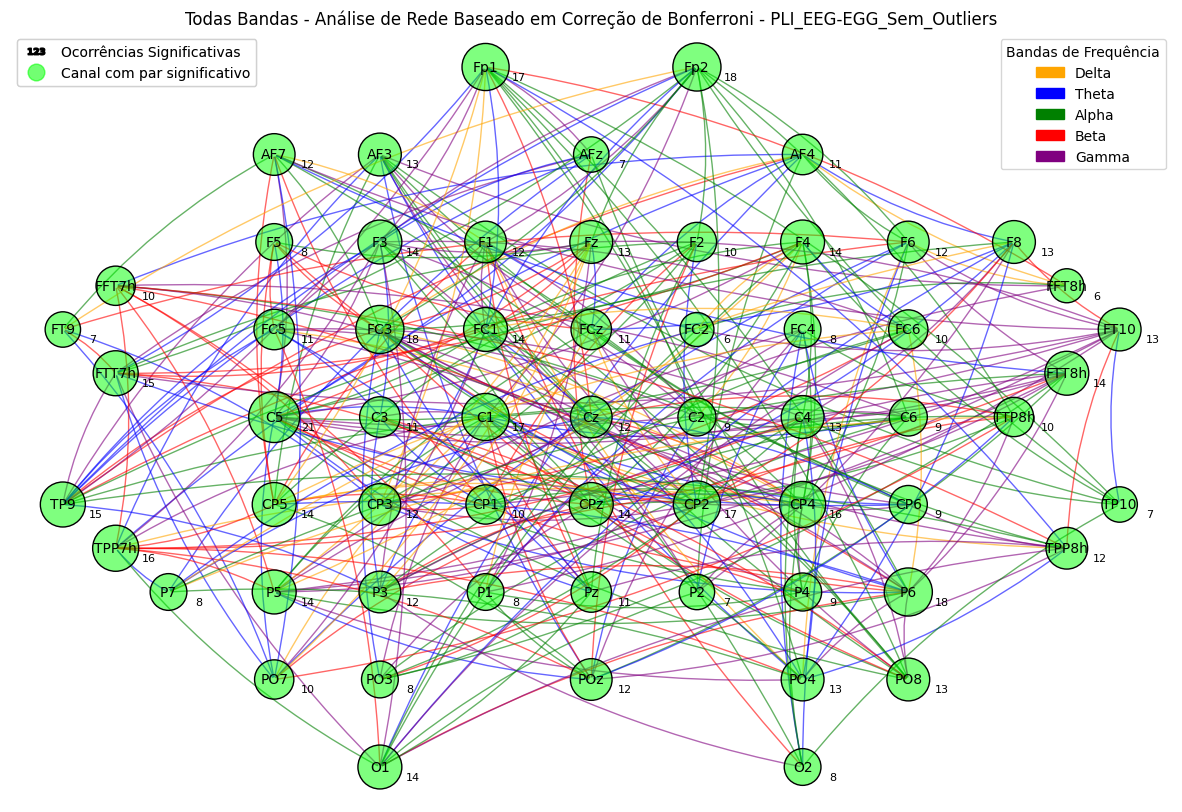

In [ ]:
# Call the function
plot_network(df, channel_positions, mode='all', title=f"Todas Bandas - Análise de Rede Baseado em Correção de Bonferroni - {subtitle}")

Imagem salva como: network_graphs/PLI_EEG-EGG_Sem_Outliers/Banda_Delta_(0.5_a_4_Hz)_-_Análise_de_Rede_-_PLI_EEG-EGG_Sem_Outliers.png


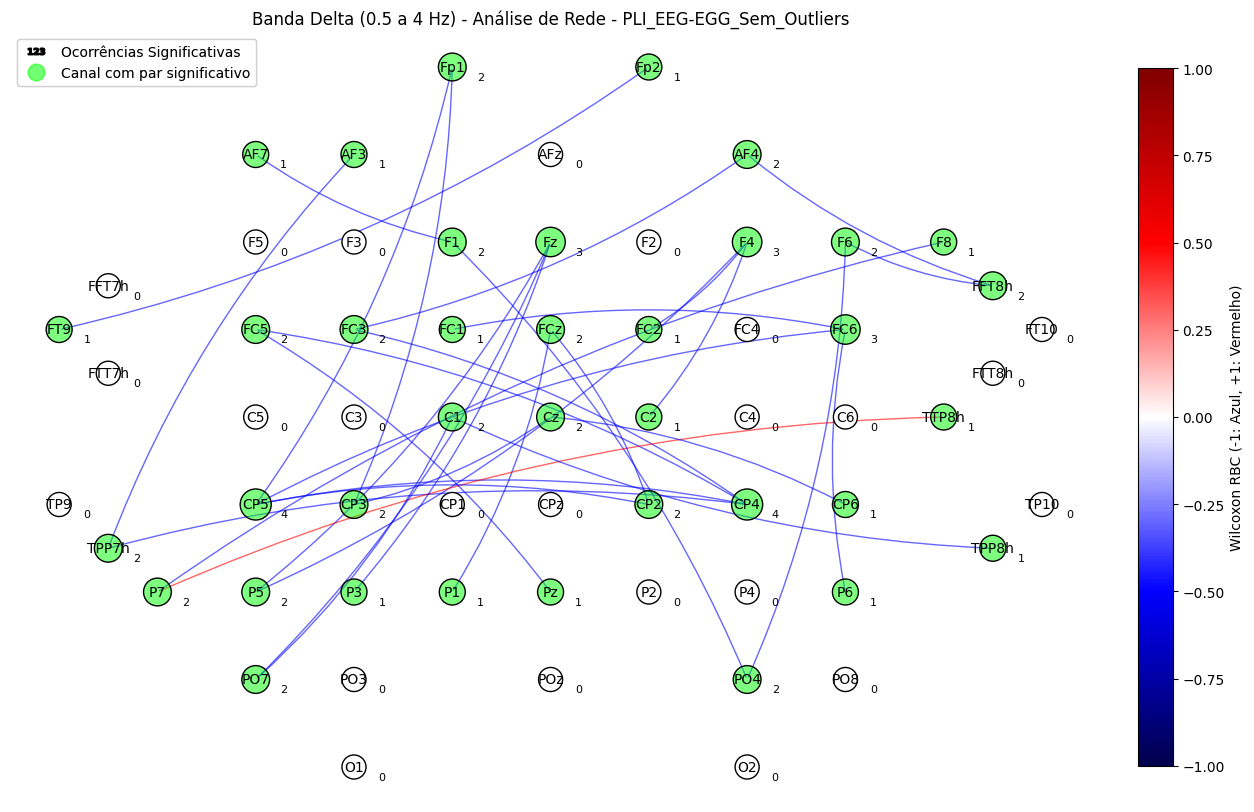

In [ ]:
plot_network(df, channel_positions, mode='delta', title=f"Banda Delta (0.5 a 4 Hz) - Análise de Rede - {subtitle}")

Imagem salva como: network_graphs/PLI_EEG-EGG_Sem_Outliers/Banda_Theta_(4_Hz_a_8_Hz)_-_Análise_de_Rede_-_PLI_EEG-EGG_Sem_Outliers.png


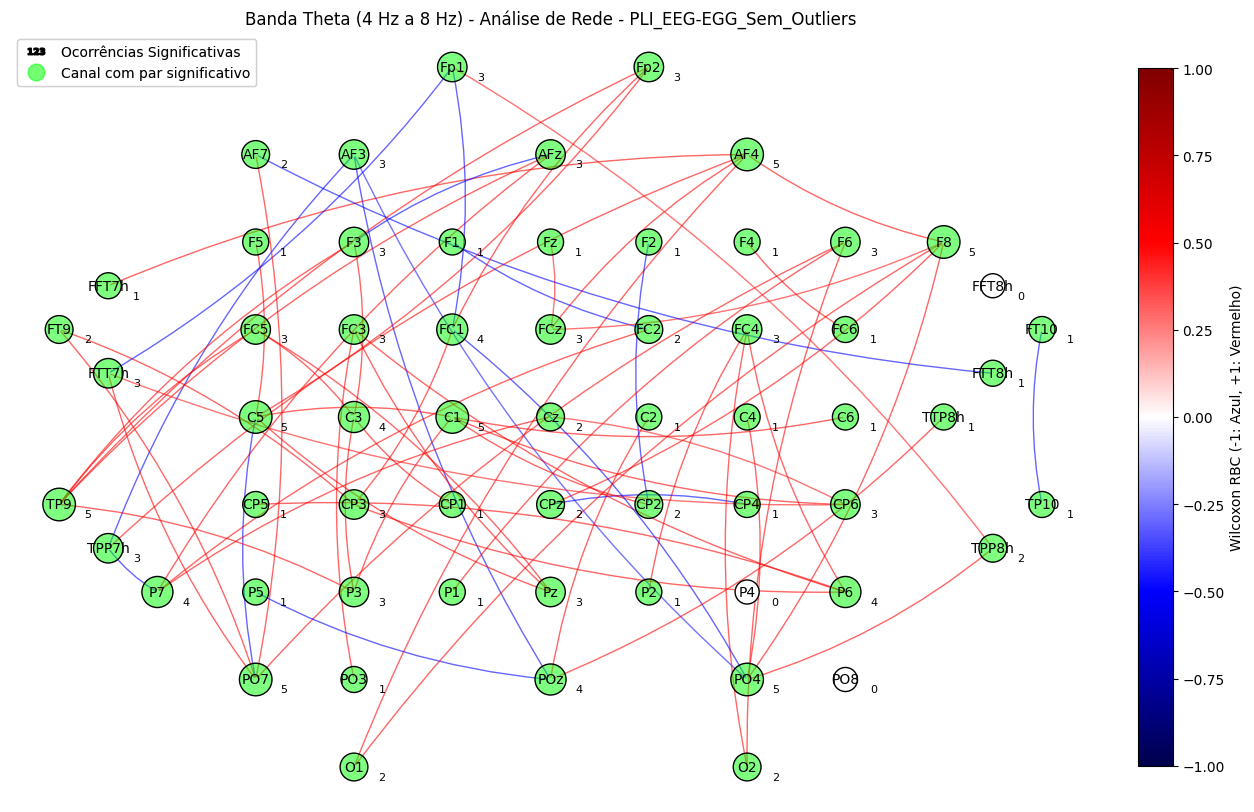

In [ ]:
plot_network(df, channel_positions, mode='theta', title=f"Banda Theta (4 Hz a 8 Hz) - Análise de Rede - {subtitle}")

Imagem salva como: network_graphs/PLI_EEG-EGG_Sem_Outliers/Banda_Alpha_(8_Hz_a_13_Hz)_-_Análise_de_Rede_-_PLI_EEG-EGG_Sem_Outliers.png


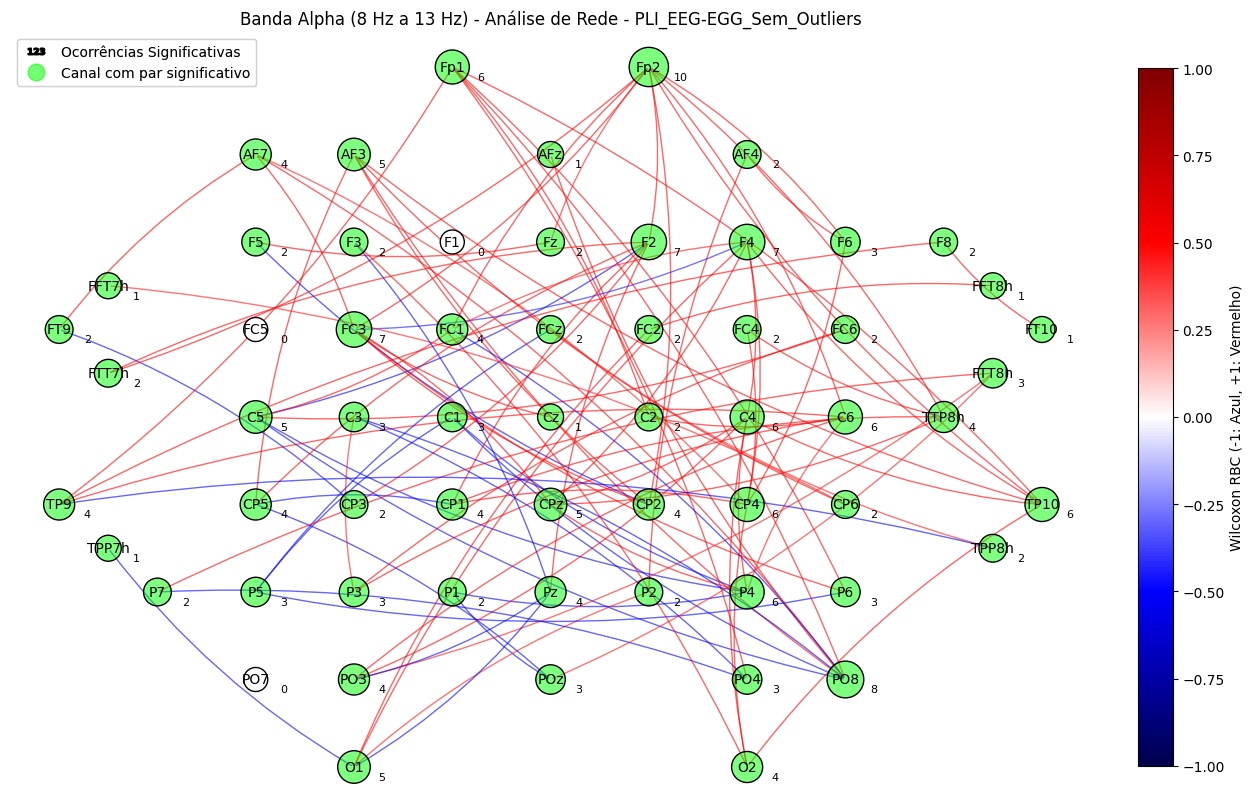

In [ ]:
plot_network(df, channel_positions, mode='alpha', title=f"Banda Alpha (8 Hz a 13 Hz) - Análise de Rede - {subtitle}")

Imagem salva como: network_graphs/PLI_EEG-EGG_Sem_Outliers/Banda_Beta_(13_Hz_a_30_Hz)_-_Análise_de_Rede_-_PLI_EEG-EGG_Sem_Outliers.png


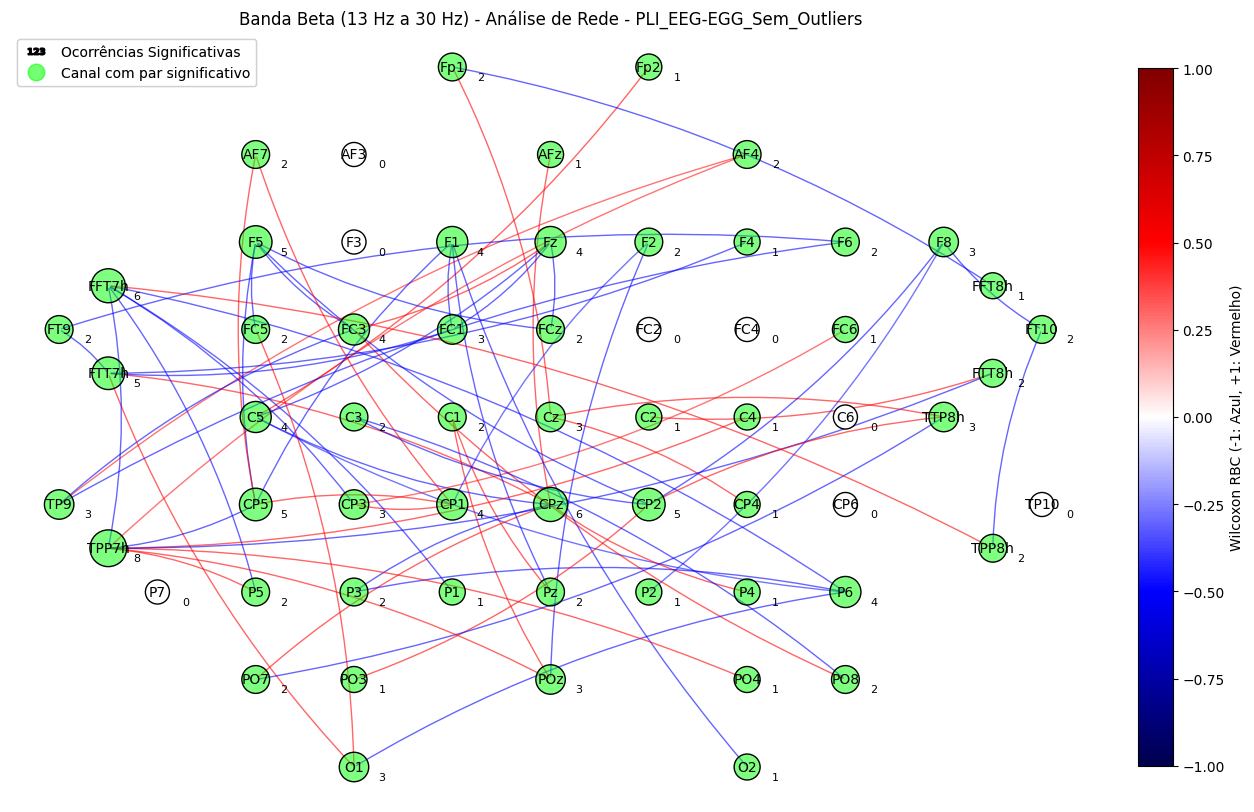

In [ ]:
plot_network(df, channel_positions, mode='beta', title=f"Banda Beta (13 Hz a 30 Hz) - Análise de Rede - {subtitle}")

Imagem salva como: network_graphs/PLI_EEG-EGG_Sem_Outliers/Banda_Gamma_(30_Hz_a_60_Hz)_-_Análise_de_Rede_-_PLI_EEG-EGG_Sem_Outliers.png


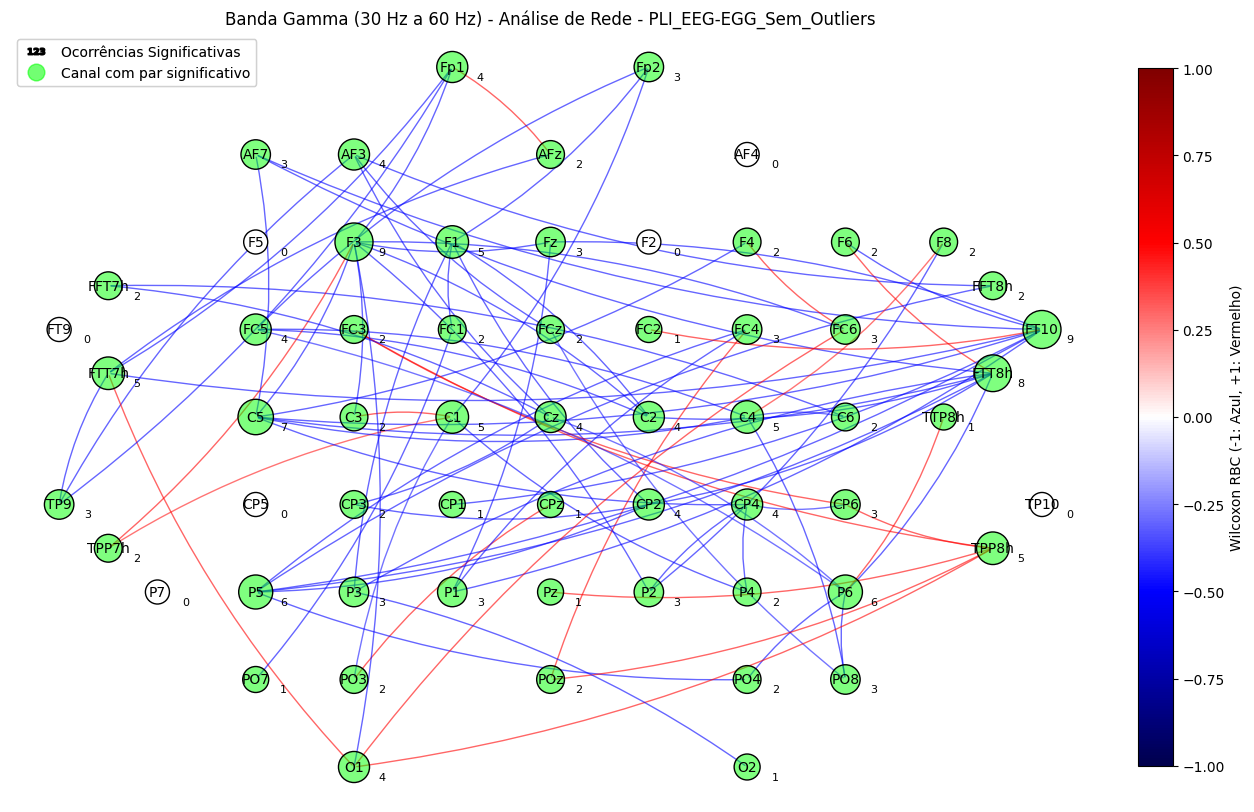

In [ ]:
plot_network(df, channel_positions, mode='gamma', title=f"Banda Gamma (30 Hz a 60 Hz) - Análise de Rede - {subtitle}")

Imagem salva como: network_graphs/PLI_EEG-EGG_Sem_Outliers/Diferença_Positiva_Média_-_Todas_Bandas_-_PLI_EEG-EGG_Sem_Outliers.png


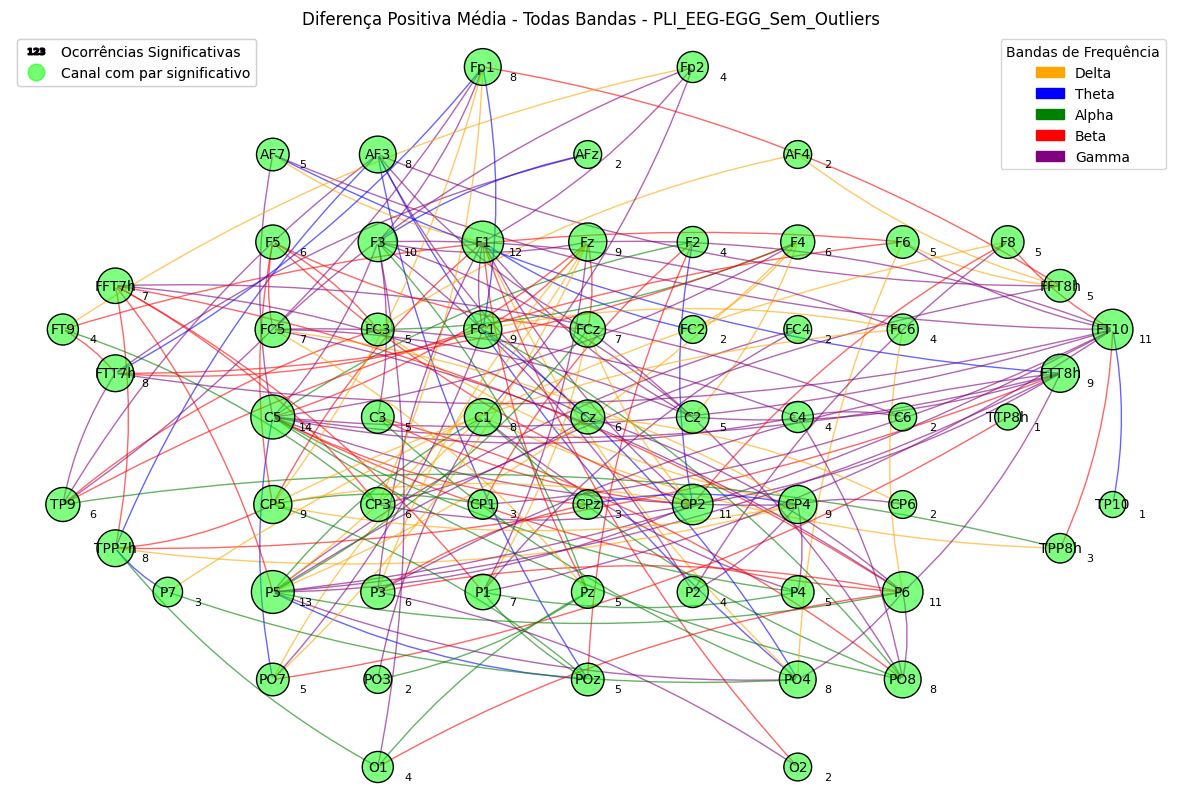

In [ ]:
plot_network(df, channel_positions, mode='positive', title=f"Diferença Positiva Média - Todas Bandas - {subtitle}")

Imagem salva como: network_graphs/PLI_EEG-EGG_Sem_Outliers/Diferença_Negativa_Média_-_Todas_Bandas_-_PLI_EEG-EGG_Sem_Outliers.png


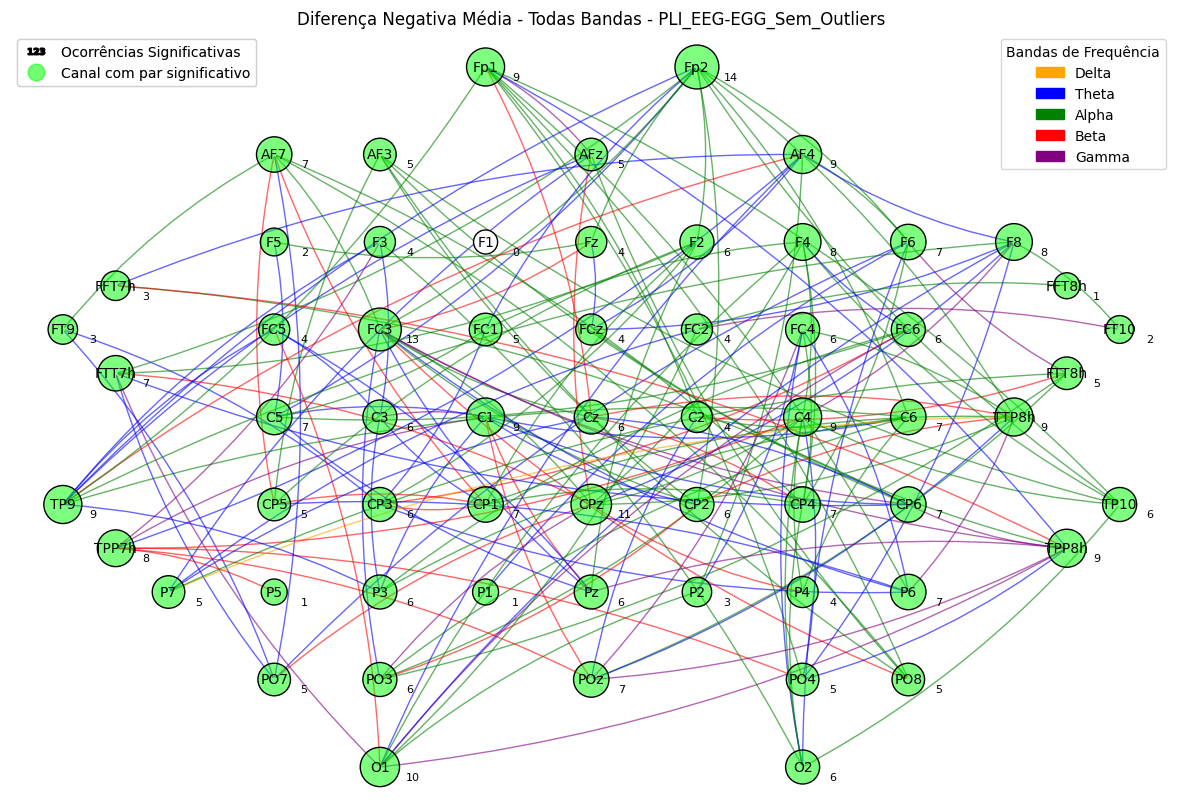

In [ ]:
plot_network(df, channel_positions, mode='negative', title=f"Diferença Negativa Média - Todas Bandas - {subtitle}")

## zip

In [ ]:
!zip -r centrality_graphs.zip centrality_graphs
# !zip -r effect_size_histograms.zip effect_size_histograms
# !zip -r network_graphs.zip network_graphs

  adding: centrality_graphs/ (stored 0%)
  adding: centrality_graphs/PLI_EEG-EGG_Sem_Outliers/ (stored 0%)
  adding: centrality_graphs/PLI_EEG-EGG_Sem_Outliers/Degree_Centrality__gamma__PLI_EEGEGG_Sem_Outliers.png (deflated 8%)
  adding: centrality_graphs/PLI_EEG-EGG_Sem_Outliers/Degree_Centrality__theta__PLI_EEGEGG_Sem_Outliers.png (deflated 9%)
  adding: centrality_graphs/PLI_EEG-EGG_Sem_Outliers/Eigenvector_Centrality__theta__PLI_EEGEGG_Sem_Outliers.png (deflated 7%)
  adding: centrality_graphs/PLI_EEG-EGG_Sem_Outliers/Eigenvector_Centrality__gamma__PLI_EEGEGG_Sem_Outliers.png (deflated 7%)
  adding: centrality_graphs/PLI_EEG-EGG_Sem_Outliers/Degree_Centrality__alpha__PLI_EEGEGG_Sem_Outliers.png (deflated 7%)
  adding: centrality_graphs/PLI_EEG-EGG_Sem_Outliers/Betweenness_Centrality__beta__PLI_EEGEGG_Sem_Outliers.png (deflated 9%)
  adding: centrality_graphs/PLI_EEG-EGG_Sem_Outliers/Betweenness_Centrality__delta__PLI_EEGEGG_Sem_Outliers.png (deflated 14%)
  adding: centrality_graph